# Analysis of the NIS800-53 regulations, Are the NIS families real?

In this notebook we take the excel of the NIS regulations from [their cite](https://csrc.nist.gov/pubs/sp/800/53/r5/upd1/final).
We take specifically the NIS regulations because they come with a column of **'Related Controls'** that we will base our analysis on.
(on the next work we would generate the **'Related Controls'** column using NLP analysis in order to make the analysis more general for any set or sets of regulations)

In the NIS800-53 regulations we have control which have a code of two upper case letters a '-' symbol then a number ('XX-0'), and sub-control which have the code of their main control followed by their number in round parentheses ('XX-0(0)'). The controls are themselves clustered into families which are indicated by the letters in their code. 

The thing is that we have reasons to believe that the families may not be real and may be just an arbitrary clustering made by the people how wrote them.

we reason that good families helps with the understanding and the structuring of the regulations, and the better the families and regulations structure will be it will be easier to understand and follow the regulations, and also to do checks on the following and adherence to those regulations. 

our definition of a real family is that the family members needs to be more related to other members of their own family than to members of other families!
we got to this definition from wanting a clear definition that is human independent and easy to check and understand.

and with this starting points we will make an analysis of the NIS800-53 regulations to see the relations structure and see about the status of the families in NIS.

In [1]:

import pandas as pd

import matplotlib.pyplot as plt

import networkx as nx



# read the NIS800-53 regulations

In [2]:

NIS_regulations = pd.read_excel("regulations//sp800-53r5-control-catalog.xlsx")
NIS_regulations


Control Identifier              Control (or Control Enhancement) Name  \
0                  AC-1                              Policy and Procedures   
1                  AC-2                                 Account Management   
2               AC-2(1)  Account Management | Automated System Account ...   
3               AC-2(2)  Account Management | Automated Temporary and E...   
4               AC-2(3)              Account Management | Disable Accounts   
...                 ...                                                ...   
1184              SR-11                             Component Authenticity   
1185           SR-11(1)  Component Authenticity | Anti-counterfeit Trai...   
1186           SR-11(2)  Component Authenticity | Configuration Control...   
1187           SR-11(3)  Component Authenticity | Anti-counterfeit Scan...   
1188              SR-12                                 Component Disposal   

                                           Control Text  \
0     a. Develop, document, and disseminate to [Assi...   
1     a. Define and document the types of accounts a...   
2     Support the management of system accounts usin...   
3     Automatically [Selection: remove; disable] tem...   
4     Disable accounts within [Assignment: organizat...   
...                                                 ...   
1184  a. Develop and implement anti-counterfeit poli...   
1185  Train [Assignment: organization-defined person...   
1186  Maintain configuration control over the follow...   
1187  Scan for counterfeit system components [Assign...   
1188  Dispose of [Assignment: organization-defined d...   

                                             Discussion  \
0     Access control policy and procedures address t...   
1     Examples of system account types include indiv...   
2     Automated system account management includes u...   
3     Management of temporary and emergency accounts...   
4     Disabling expired, inactive, or otherwise anom...   
...                                                 ...   
1184  Sources of counterfeit components include manu...   
1185                                              None.   
1186                                              None.   
1187  The type of component determines the type of s...   
1188  Data, documentation, tools, or system componen...   

                                       Related Controls  
0                      IA-1, PM-9, PM-24, PS-8, SI-12 .  
1     AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ...  
2                                                 None.  
3                                                 None.  
4                                                 None.  
...                                                 ...  
1184                     PE-3, SA-4, SI-7, SR-9, SR-10.  
1185                                              AT-3.  
1186                           CM-3, MA-2, MA-4, SA-10.  
1187                                              RA-5.  
1188                                              MP-6.  

[1189 rows x 5 columns]

## add columns for "Main Control Name" and "Family Name"

In [3]:

NIS_regulations["Main Control Name"] = NIS_regulations["Control Identifier"].apply(lambda x: x[:x.find("(")] if x.find("(") != -1 else x)
NIS_regulations["Family Name"] = NIS_regulations["Control Identifier"].str[:2]

# NIS_regulations["Control Identifier"].str.find("(")
# NIS_regulations["Control Identifier"].str[:NIS_regulations["Control Identifier"].str.find("(")]

# NIS_regulations["Control Identifier"].apply(lambda x: x[:x.find("(")] if x.find("(") != -1 else x)


# drop all Withdrawn Controls

In [4]:

NIS_regulations["Control Text"].str.contains("Withdrawn: ")
sum(NIS_regulations["Control Text"].str.contains("Withdrawn: "))

Active_NIS_regulations = NIS_regulations.loc[~NIS_regulations["Control Text"].str.contains("Withdrawn: ")]
Active_NIS_regulations


Control Identifier              Control (or Control Enhancement) Name  \
0                  AC-1                              Policy and Procedures   
1                  AC-2                                 Account Management   
2               AC-2(1)  Account Management | Automated System Account ...   
3               AC-2(2)  Account Management | Automated Temporary and E...   
4               AC-2(3)              Account Management | Disable Accounts   
...                 ...                                                ...   
1184              SR-11                             Component Authenticity   
1185           SR-11(1)  Component Authenticity | Anti-counterfeit Trai...   
1186           SR-11(2)  Component Authenticity | Configuration Control...   
1187           SR-11(3)  Component Authenticity | Anti-counterfeit Scan...   
1188              SR-12                                 Component Disposal   

                                           Control Text  \
0     a. Develop, document, and disseminate to [Assi...   
1     a. Define and document the types of accounts a...   
2     Support the management of system accounts usin...   
3     Automatically [Selection: remove; disable] tem...   
4     Disable accounts within [Assignment: organizat...   
...                                                 ...   
1184  a. Develop and implement anti-counterfeit poli...   
1185  Train [Assignment: organization-defined person...   
1186  Maintain configuration control over the follow...   
1187  Scan for counterfeit system components [Assign...   
1188  Dispose of [Assignment: organization-defined d...   

                                             Discussion  \
0     Access control policy and procedures address t...   
1     Examples of system account types include indiv...   
2     Automated system account management includes u...   
3     Management of temporary and emergency accounts...   
4     Disabling expired, inactive, or otherwise anom...   
...                                                 ...   
1184  Sources of counterfeit components include manu...   
1185                                              None.   
1186                                              None.   
1187  The type of component determines the type of s...   
1188  Data, documentation, tools, or system componen...   

                                       Related Controls Main Control Name  \
0                      IA-1, PM-9, PM-24, PS-8, SI-12 .              AC-1   
1     AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ...              AC-2   
2                                                 None.              AC-2   
3                                                 None.              AC-2   
4                                                 None.              AC-2   
...                                                 ...               ...   
1184                     PE-3, SA-4, SI-7, SR-9, SR-10.             SR-11   
1185                                              AT-3.             SR-11   
1186                           CM-3, MA-2, MA-4, SA-10.             SR-11   
1187                                              RA-5.             SR-11   
1188                                              MP-6.             SR-12   

     Family Name  
0             AC  
1             AC  
2             AC  
3             AC  
4             AC  
...          ...  
1184          SR  
1185          SR  
1186          SR  
1187          SR  
1188          SR  

[1007 rows x 7 columns]

there are 1007 controls and sub-controls after removing all Withdrawn controls and sub-controls


## fix problem with relation to Withdrawn Control AU-15
change to AU-5
[Withdrawn: Moved to AU-5(5).]

In [5]:

# Active_NIS_regulations["Related Controls"] = Active_NIS_regulations["Related Controls"].str.replace("AU-15","AU-5")
Active_NIS_regulations.loc[:,"Related Controls"] = Active_NIS_regulations.loc[:,"Related Controls"].str.replace("AU-15","AU-5")

# Active_NIS_regulations.loc[Active_NIS_regulations["Main Control Name"]=="AU-5"]


In [6]:
Active_NIS_regulations

Control Identifier              Control (or Control Enhancement) Name  \
0                  AC-1                              Policy and Procedures   
1                  AC-2                                 Account Management   
2               AC-2(1)  Account Management | Automated System Account ...   
3               AC-2(2)  Account Management | Automated Temporary and E...   
4               AC-2(3)              Account Management | Disable Accounts   
...                 ...                                                ...   
1184              SR-11                             Component Authenticity   
1185           SR-11(1)  Component Authenticity | Anti-counterfeit Trai...   
1186           SR-11(2)  Component Authenticity | Configuration Control...   
1187           SR-11(3)  Component Authenticity | Anti-counterfeit Scan...   
1188              SR-12                                 Component Disposal   

                                           Control Text  \
0     a. Develop, document, and disseminate to [Assi...   
1     a. Define and document the types of accounts a...   
2     Support the management of system accounts usin...   
3     Automatically [Selection: remove; disable] tem...   
4     Disable accounts within [Assignment: organizat...   
...                                                 ...   
1184  a. Develop and implement anti-counterfeit poli...   
1185  Train [Assignment: organization-defined person...   
1186  Maintain configuration control over the follow...   
1187  Scan for counterfeit system components [Assign...   
1188  Dispose of [Assignment: organization-defined d...   

                                             Discussion  \
0     Access control policy and procedures address t...   
1     Examples of system account types include indiv...   
2     Automated system account management includes u...   
3     Management of temporary and emergency accounts...   
4     Disabling expired, inactive, or otherwise anom...   
...                                                 ...   
1184  Sources of counterfeit components include manu...   
1185                                              None.   
1186                                              None.   
1187  The type of component determines the type of s...   
1188  Data, documentation, tools, or system componen...   

                                       Related Controls Main Control Name  \
0                      IA-1, PM-9, PM-24, PS-8, SI-12 .              AC-1   
1     AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ...              AC-2   
2                                                 None.              AC-2   
3                                                 None.              AC-2   
4                                                 None.              AC-2   
...                                                 ...               ...   
1184                     PE-3, SA-4, SI-7, SR-9, SR-10.             SR-11   
1185                                              AT-3.             SR-11   
1186                           CM-3, MA-2, MA-4, SA-10.             SR-11   
1187                                              RA-5.             SR-11   
1188                                              MP-6.             SR-12   

     Family Name  
0             AC  
1             AC  
2             AC  
3             AC  
4             AC  
...          ...  
1184          SR  
1185          SR  
1186          SR  
1187          SR  
1188          SR  

[1007 rows x 7 columns]

# checking the "Related Controls" column

we want to know what are the stats of the current state.

## run describe on the "Related Controls" column

In [7]:
Active_NIS_regulations["Related Controls"].describe(include="all")

count      1007
unique      540
top       None.
freq        361
Name: Related Controls, dtype: object

there are no missing values

361 controls/sub-controls are said to be unrelated to any other controls/sub-controls

## check the column for the sub-controls

In [8]:

Active_NIS_regulations["Control Identifier"].str.contains("\(")
sub_controls = Active_NIS_regulations.loc[Active_NIS_regulations["Control Identifier"].str.contains("\(")]
sub_controls["Related Controls"].value_counts(normalize=True)


Related Controls
None.                                  0.493653
SC-12, SC-13.                          0.015515
RA-3.                                  0.011283
SC-8, SC-12, SC-13.                    0.008463
AC-3.                                  0.008463
                                         ...   
CM-2, CM-6.                            0.001410
AC-3, AC-6, MP-2, MP-4, PE-3, PE-6.    0.001410
IA-10, IA-11, SC-37.                   0.001410
AU-2.                                  0.001410
RA-5.                                  0.001410
Name: proportion, Length: 270, dtype: float64

about half of the sub-controls are written to not be related to any other Control

## look for non-related Controls

In [9]:

full_controls = Active_NIS_regulations.loc[~Active_NIS_regulations["Control Identifier"].str.contains("\(")]
non_related_controls = full_controls.loc[full_controls["Related Controls"].str.lower().str.contains("none")]
print(len(non_related_controls))
non_related_controls


11


Control Identifier          Control (or Control Enhancement) Name  \
163                AT-6                              Training Feedback   
554                MP-8                              Media Downgrading   
636                PM-2   Information Security Program Leadership Role   
639                PM-5                               System Inventory   
689                PS-9                          Position Descriptions   
690                PT-1                          Policy and Procedures   
732                RA-6  Technical Surveillance Countermeasures Survey   
1043              SC-51                      Hardware-based Protection   
1118              SI-10                   Information Input Validation   
1160              SI-22                          Information Diversity   
1161              SI-23                      Information Fragmentation   

                                           Control Text  \
163   Provide feedback on organizational training re...   
554   a. Establish [Assignment: organization-defined...   
636   Appoint a senior agency information security o...   
639   Develop and update [Assignment: organization-d...   
689   Incorporate security and privacy roles and res...   
690   a. Develop, document, and disseminate to [Assi...   
732   Employ a technical surveillance countermeasure...   
1043  a. Employ hardware-based, write-protect for [A...   
1118  Check the validity of the following informatio...   
1160  a. Identify the following alternative sources ...   
1161  Based on [Assignment: organization-defined cir...   

                                             Discussion Related Controls  \
163   Training feedback includes awareness training ...            None.   
554   Media downgrading applies to digital and non-d...            None.   
636   The senior agency information security officer...            None.   
639   OMB A-130 provides guidance on developing syst...            None.   
689   Specification of security and privacy roles in...            None.   
690   Personally identifiable information processing...            None.   
732   A technical surveillance countermeasures surve...            None.   
1043                                              None.            None.   
1118  Checking the valid syntax and semantics of sys...            None.   
1160  Actions taken by a system service or a functio...            None.   
1161  One objective of the advanced persistent threa...            None.   

     Main Control Name Family Name  
163               AT-6          AT  
554               MP-8          MP  
636               PM-2          PM  
639               PM-5          PM  
689               PS-9          PS  
690               PT-1          PT  
732               RA-6          RA  
1043             SC-51          SC  
1118             SI-10          SI  
1160             SI-22          SI  
1161             SI-23          SI

there are 11 controls that are said to not be related to any other control

## look if there are any sub-controls in the "Related Controls" column

In [10]:

Active_NIS_regulations["Related Controls"].str.contains("\(")
related_to_sub_controls = Active_NIS_regulations.loc[Active_NIS_regulations["Related Controls"].str.contains("\(")]
related_to_sub_controls


Empty DataFrame
Columns: [Control Identifier, Control (or Control Enhancement) Name, Control Text, Discussion, Related Controls, Main Control Name, Family Name]
Index: []

looks like nothing is related to a sub-control

## look if the controls are mutually related
if control A or any of its sub-controls is related to control B, then control B or any of its sub-controls are also related to control A 

in order to help with future operations we will create a function that will get a pandas DataFrame of the regulations with columns indicating the name of the regulation and what family it belongs to and will return a statistical analysis of the inner vs outer connections between regulation families.

In [11]:

def get_mutual_relations(regulations_DataFrame:pd.DataFrame, 
                         name_column:str = "Main Control Name", family_column:str = "Family Name",
                         do_print:bool = True):
    # make mutually_related and not_mutually_related DataFrames
    mutually_related = pd.DataFrame(columns=["origen control","related control","same family",])
    m_r = 0
    not_mutually_related = pd.DataFrame(columns=["origen control","related control","same family",])
    n_m_r = 0

    # group controls and sub-controls
    controls_and_subs = regulations_DataFrame.groupby(by=[name_column])

    for inxs,group in controls_and_subs:
        # print(group)
        if do_print: print(inxs)

        Control_name = inxs[0]
        # get Related_Controls for the whole group
        Related_Controls = set()
        for j, row in group.iterrows():
            R = row["Related Controls"].replace(" .","").replace(".","").split(", ")
            if "None" not in R:
                Related_Controls = Related_Controls | set(R)

        # for each of the Related_Controls check if relates back to the origen control
        for R_Control in Related_Controls:
            # print(R_Control)
            # if R_Control == "AU-15":
            #     R_Control = "AU-5"
            R_group = controls_and_subs.get_group(name=(R_Control))
            flag = False
            for k, R_row in R_group.iterrows():
                if Control_name in R_row["Related Controls"].replace(" .","").replace(".","").split(", "):
                    flag = True
            if not flag:
                if do_print: print(f"{Control_name} is related to {R_Control} but not otherwise")
                same_family = regulations_DataFrame.loc[regulations_DataFrame[name_column]==Control_name,family_column].iloc[0] == regulations_DataFrame.loc[regulations_DataFrame[name_column]==R_Control,family_column].iloc[0]
                not_mutually_related.loc[n_m_r,:] = [Control_name,R_Control,same_family]
                # not_mutually_related.loc[n_m_r,:] = [Control_name,R_Control,Control_name[:2] == R_Control[:2]]
                n_m_r += 1
            else:
                # print(f"{Control_name} is mutually related to {R_Control}")
                same_family = regulations_DataFrame.loc[regulations_DataFrame[name_column]==Control_name,family_column].iloc[0] == regulations_DataFrame.loc[regulations_DataFrame[name_column]==R_Control,family_column].iloc[0]
                mutually_related.loc[m_r,:] = [Control_name,R_Control,same_family]
                # mutually_related.loc[m_r,:] = [Control_name,R_Control,Control_name[:2] == R_Control[:2]]
                m_r += 1

    # drop the mutual self connections 
    mutually_related = mutually_related.loc[mutually_related["origen control"] != mutually_related["related control"]]

    # in family connection statistics
    in_family_connection_statistics = pd.Series()
    in_family_connection_statistics["number of families"] = regulations_DataFrame[family_column].nunique()
    in_family_connection_statistics["number of participating controls"] = regulations_DataFrame.loc[:,[name_column,family_column]].dropna().nunique()[name_column]
    
    in_family_connection_statistics["same family connections"] = sum(not_mutually_related["same family"]==True) + sum(mutually_related["same family"]==True)
    in_family_connection_statistics["out of family connections"] = sum(not_mutually_related["same family"]==False) + sum(mutually_related["same family"]==False)
    
    in_family_connection_ratio_1 = (sum(not_mutually_related["same family"]==True) + sum(mutually_related["same family"]==True)/1) / (sum(not_mutually_related["same family"]==False) + sum(mutually_related["same family"]==False)/1)
    in_family_connection_statistics["empiric connection ratio 1 (total/total)"] = in_family_connection_ratio_1

    # group families

    families = regulations_DataFrame.groupby(by=[family_column])
    regulations_DataFrame
    num_Controls = regulations_DataFrame[name_column].nunique()
    # print(f"num_Controls = {num_Controls}")
    num_Family_Controls = families[name_column].nunique()
    names_Family_Controls = families[name_column].unique()
    sum_Controls = num_Family_Controls.sum()
    # print(f"sum_Controls = {sum_Controls}")
    # print(f"num_Family_Controls:\n{num_Family_Controls}")
    # print(f"names_Family_Controls:\n{names_Family_Controls}")

    # Active_NIS_regulations["Family Name"].nunique()

    relations_statistics = pd.DataFrame(index=num_Family_Controls.index,
                                        columns=["number of regulations","names of regulations", 
                                                 "possible inside relations","actual inside relations","percentage inside relations",
                                                 "possible outside relations","actual outside relations","percentage outside relations",
                                                 "ratio inner to outer relations"])
    relations_statistics["number of regulations"] = num_Family_Controls
    relations_statistics["names of regulations"] = names_Family_Controls
    # print(f"relations_statistics:\n{relations_statistics}")
    # possible_inside_relations = pd.Series(0,index=num_Family_Controls.index)
    # possible_outside_relations = pd.Series(0,index=num_Family_Controls.index)

    # calculate how many inside and outside relations each family can have


    for inx1 in num_Family_Controls.index:
        # get possible
        relations_statistics.loc[inx1,"possible inside relations"] = num_Family_Controls.loc[inx1] * (num_Family_Controls.loc[inx1] - 1)
        # possible_inside_relations.loc[inx1] = num_Family_Controls.loc[inx1] * (num_Family_Controls.loc[inx1] - 1)
        relations_statistics.loc[inx1,"possible outside relations"] = num_Family_Controls.loc[inx1] * (sum_Controls - num_Family_Controls.loc[inx1])
        # possible_outside_relations.loc[inx1] = num_Family_Controls.loc[inx1] * (sum_Controls - num_Family_Controls.loc[inx1])
        
        # get actual
        relations_statistics.loc[inx1,"actual inside relations"] = sum((not_mutually_related["origen control"].isin(names_Family_Controls[inx1])) & (not_mutually_related["same family"] == True))\
                                                                    + sum((mutually_related["origen control"].isin(names_Family_Controls[inx1])) & (mutually_related["same family"] == True))
        relations_statistics.loc[inx1,"actual outside relations"] = sum((not_mutually_related["origen control"].isin(names_Family_Controls[inx1])) & (not_mutually_related["same family"] == False))\
                                                                    + sum((mutually_related["origen control"].isin(names_Family_Controls[inx1])) & (mutually_related["same family"] == False))
        # pass
    
    # calculate inner to outer relations ratio
    relations_statistics["ratio inner to outer relations"] = relations_statistics["actual inside relations"] / relations_statistics["actual outside relations"]

    # calculate percentages
    relations_statistics["percentage inside relations"] = relations_statistics["actual inside relations"] / relations_statistics["possible inside relations"]
    relations_statistics["percentage outside relations"] = relations_statistics["actual outside relations"] / relations_statistics["possible outside relations"]

    # print(f"possible_inside_relations:\n{possible_inside_relations}")
    # print(f"possible_outside_relations:\n{possible_outside_relations}")

    in_family_connection_statistics["empiric connection ratio 2 (mean ratio per family)"] = relations_statistics["ratio inner to outer relations"].mean()

    p_in_1 = relations_statistics["actual inside relations"].sum()/relations_statistics["possible inside relations"].sum()
    p_in_2 = relations_statistics["percentage inside relations"].mean()
    in_family_connection_statistics["percentage of possible in-family connections exists 1 (total/total)"] = p_in_1
    in_family_connection_statistics["percentage of possible in-family connections exists 2 (mean per family)"] = p_in_2

    # p_in = (not_mutually_related["same family"].sum() + mutually_related["same family"].sum()) / possible_inside_relations.sum()
    # print(f"{p_in:.2%} of possible in-family connections exists")
    # in_family_connection_statistics["percentage of possible in-family connections exists"] = p_in
    

    p_out_1 = relations_statistics["actual outside relations"].sum()/relations_statistics["possible outside relations"].sum()
    p_out_2 = relations_statistics["percentage outside relations"].mean()
    in_family_connection_statistics["percentage of possible out of family connections exist 1 (total/total)"] = p_out_1
    in_family_connection_statistics["percentage of possible out of family connections exists 2 (mean per family)"] = p_out_2

    # p_out = ((len(not_mutually_related) - not_mutually_related["same family"].sum()) + (len(mutually_related) - mutually_related["same family"].sum())) / possible_outside_relations.sum()
    # print(f"{p_out:.2%} of possible out of family connections exists")
    # in_family_connection_statistics["percentage of possible out of family connections exists"] = p_out

    in_family_connection_statistics["statistical connection ratio 1 (ratio of total/total)"] = p_in_1 / p_out_1
    in_family_connection_statistics["statistical connection ratio 2 (ratio of mean per family)"] = p_in_2 / p_out_2
    in_family_connection_statistics["statistical connection ratio 3 (mean of the ratios per family)"] = (relations_statistics["percentage inside relations"] / relations_statistics["percentage outside relations"]).mean()
    # in_family_connection_statistics["statistical connection ratio"] = p_in / p_out

    return mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics


In [12]:

mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics = get_mutual_relations(Active_NIS_regulations,do_print=True)
print(f"there are {len(not_mutually_related)} non-mutual connections")


('AC-1',)
AC-1 is related to PM-24 but not otherwise
AC-1 is related to PS-8 but not otherwise
AC-1 is related to SI-12 but not otherwise
('AC-10',)
('AC-11',)
AC-11 is related to PL-4 but not otherwise
AC-11 is related to AC-7 but not otherwise
('AC-12',)
AC-12 is related to SC-10 but not otherwise
AC-12 is related to SC-23 but not otherwise
('AC-14',)
('AC-16',)
AC-16 is related to SC-13 but not otherwise
AC-16 is related to PT-3 but not otherwise
AC-16 is related to SC-12 but not otherwise
('AC-17',)
AC-17 is related to SC-23 but not otherwise
AC-17 is related to CA-3 but not otherwise
('AC-18',)
AC-18 is related to SC-15 but not otherwise
AC-18 is related to SC-12 but not otherwise
('AC-19',)
AC-19 is related to IA-2 but not otherwise
AC-19 is related to SC-12 but not otherwise
AC-19 is related to AC-11 but not otherwise
('AC-2',)
AC-2 is related to MA-3 but not otherwise
AC-2 is related to AC-16 but not otherwise
AC-2 is related to AU-12 but not otherwise
AC-2 is related to IA-4 b

it looks that there are plenty (645) of non-mutual connections, and it is hard to say if this is intentional or just mistakes/oversights ?!

## are Controls more related to their own family or to other families?

In [13]:

print(f"the in_family_connection_ratios are: {in_family_connection_statistics['empiric connection ratio 1 (total/total)']:.3} , {in_family_connection_statistics['empiric connection ratio 2 (mean ratio per family)']:.3}")
in_family_connection_statistics
# relations_statistics



the in_family_connection_ratios are: 0.33 , 0.319


number of families                                                               20.000000
number of participating controls                                                298.000000
same family connections                                                         785.000000
out of family connections                                                      2382.000000
empiric connection ratio 1 (total/total)                                          0.329555
empiric connection ratio 2 (mean ratio per family)                                0.319256
percentage of possible in-family connections exists 1 (total/total)               0.128394
percentage of possible in-family connections exists 2 (mean per family)           0.236464
percentage of possible out of family connections exist 1 (total/total)            0.028911
percentage of possible out of family connections exists 2 (mean per family)       0.030499
statistical connection ratio 1 (ratio of total/total)                             4.441069

In [14]:

# prepare for output file
in_family_connection_statistics
in_family_connection_statistics_test = pd.DataFrame(index=in_family_connection_statistics.index)
in_family_connection_statistics_test.loc[:,"NIS800-53 families"] = in_family_connection_statistics


In [15]:

print(f'same family connections = {relations_statistics["actual inside relations"].sum()}')
print(f'out of family connections = {relations_statistics["actual outside relations"].sum()}')

print(f'percentage of possible in-family connections exists = {relations_statistics["actual inside relations"].sum()/relations_statistics["possible inside relations"].sum()}')
print(f'percentage of possible out of family connections exists = {relations_statistics["actual outside relations"].sum()/relations_statistics["possible outside relations"].sum()}')

NIS_relations_statistics = relations_statistics # prepare for output file
relations_statistics


same family connections = 785
out of family connections = 2382
percentage of possible in-family connections exists = 0.12839385017991495
percentage of possible out of family connections exists = 0.028910573842120594


number of regulations  \
Family Name                          
AC                              23   
AT                               5   
AU                              15   
CA                               8   
CM                              14   
CP                              12   
IA                              12   
IR                               9   
MA                               7   
MP                               8   
PE                              22   
PL                               8   
PM                              32   
PS                               9   
PT                               8   
RA                               9   
SA                              16   
SC                              47   
SI                              22   
SR                              12   

                                          names of regulations  \
Family Name                                                      
AC           [AC-1, AC-2, AC-3, AC-4, AC-5, AC-6, AC-7, AC-...   
AT                              [AT-1, AT-2, AT-3, AT-4, AT-6]   
AU           [AU-1, AU-2, AU-3, AU-4, AU-5, AU-6, AU-7, AU-...   
CA            [CA-1, CA-2, CA-3, CA-5, CA-6, CA-7, CA-8, CA-9]   
CM           [CM-1, CM-2, CM-3, CM-4, CM-5, CM-6, CM-7, CM-...   
CP           [CP-1, CP-2, CP-3, CP-4, CP-6, CP-7, CP-8, CP-...   
IA           [IA-1, IA-2, IA-3, IA-4, IA-5, IA-6, IA-7, IA-...   
IR           [IR-1, IR-2, IR-3, IR-4, IR-5, IR-6, IR-7, IR-...   
MA                  [MA-1, MA-2, MA-3, MA-4, MA-5, MA-6, MA-7]   
MP            [MP-1, MP-2, MP-3, MP-4, MP-5, MP-6, MP-7, MP-8]   
PE           [PE-1, PE-2, PE-3, PE-4, PE-5, PE-6, PE-8, PE-...   
PL           [PL-1, PL-2, PL-4, PL-7, PL-8, PL-9, PL-10, PL...   
PM           [PM-1, PM-2, PM-3, PM-4, PM-5, PM-6, PM-7, PM-...   
PS           [PS-1, PS-2, PS-3, PS-4, PS-5, PS-6, PS-7, PS-...   
PT            [PT-1, PT-2, PT-3, PT-4, PT-5, PT-6, PT-7, PT-8]   
RA           [RA-1, RA-2, RA-3, RA-5, RA-6, RA-7, RA-8, RA-...   
SA           [SA-1, SA-2, SA-3, SA-4, SA-5, SA-8, SA-9, SA-...   
SC           [SC-1, SC-2, SC-3, SC-4, SC-5, SC-6, SC-7, SC-...   
SI           [SI-1, SI-2, SI-3, SI-4, SI-5, SI-6, SI-7, SI-...   
SR           [SR-1, SR-2, SR-3, SR-4, SR-5, SR-6, SR-7, SR-...   

            possible inside relations actual inside relations  \
Family Name                                                     
AC                                506                      82   
AT                                 20                       6   
AU                                210                      75   
CA                                 56                      13   
CM                                182                      55   
CP                                132                      50   
IA                                132                      45   
IR                                 72                      28   
MA                                 42                       9   
MP                                 56                       9   
PE                                462                      34   
PL                                 56                      12   
PM                                992                      52   
PS                                 72                      21   
PT                                 56                      21   
RA                                 72                      20   
SA                                240                      65   
SC                               2162                     124   
SI                                462                      38   
SR                                132                      26   

            percentage inside relations possible outside relations  \
Family Name                                                          
AC                             0.162055                       6325   
AT                                  0.3                       1465   
AU          

In [16]:

# what percentage of the existing connections are in-family? 
not_mutually_related
mutually_related
s_r = sum(mutually_related["same family"]) / len(mutually_related)
s_r_n = sum(not_mutually_related["same family"]) / len(not_mutually_related)
s = (sum(mutually_related["same family"]) + sum(not_mutually_related["same family"])) / (len(mutually_related) + len(not_mutually_related))
print(f"{s:.2%} of existing connections are in-family")
print(f"{s_r:.2%} of existing mutual connections are in-family")
print(f"{s_r_n:.2%} of existing non-mutual connections are in-family")


24.79% of existing connections are in-family
26.57% of existing mutual connections are in-family
17.83% of existing non-mutual connections are in-family


from the statistical analysis of the relations within the families and between the families we see that empirically there are more than three times more relations between the families than within the families, but from the statistical point of possible relations its still 4 to 8 time more likely that an inner family relation will exist than a between families one

with this two contradicting points it can be hard to definitively say whether the division into families is correct or not?!

# make a network graph based on the "Related Controls" column

we are using graph analysis because we see it as the best suitable option for relationships analysis like in our case where we have controls that are family members and we have the "Related Controls" column that gives us the data on the connections between the controls.

In [17]:

# choose between directed or non-directed graph
Related_Controls_Graph = nx.Graph()
# Related_Controls_Graph = nx.DiGraph()

# do we want to consider only the main control and incorporate the sub-controls with the main control
# do we want to include sub-controls in the graph? 
# if sub-controls are not included in the graph they will be incorporated into their main control 
# and their connections data will be added to the connections data of their main control
# Only_Main_Controls = False
Only_Main_Controls = True

# do we want to include out of family connections (or just check the in-family connections)
All_Connections = True
# All_Connections = False

# Add Weights to the graph edges 
Add_Weights = True
# Add_Weights = False

# do we want to take each sub-Control as one member of the family or aggregate the sub-Controls as one member of the family?
# Aggregate_sub_Controls = False
Aggregate_sub_Controls = True


## add all Controls and sub-Controls as nodes

In [18]:

if Only_Main_Controls:
    Related_Controls_Graph.add_nodes_from(Active_NIS_regulations["Main Control Name"].unique())
else:
    Related_Controls_Graph.add_nodes_from(Active_NIS_regulations["Control Identifier"])



In [19]:
Related_Controls_Graph.nodes
len(Related_Controls_Graph.nodes)
# Related_Controls_Graph
print(f"number of nodes in graph: {len(Related_Controls_Graph.nodes)}\nnumber of edges in graph: {len(Related_Controls_Graph.edges)}")


number of nodes in graph: 298
number of edges in graph: 0


## make edges from every sub-control to its corresponding control

In [20]:

for node in Related_Controls_Graph.nodes:
    # print(node)
    flag = node.find("(")
    if flag != -1:
        # add data to the node
        Related_Controls_Graph.nodes[node]["Main control"] = node[:flag]
        Related_Controls_Graph.nodes[node]["family"] = node[0:2]

        # print(f"is sub-control of {node[:flag]}") 
        if nx.is_directed(Related_Controls_Graph):
            if Add_Weights:
                Related_Controls_Graph.add_edge(node,node[:flag], Relations=1, Weight=2)
                Related_Controls_Graph.add_edge(node[:flag],node, Relations=1, Weight=2)
            else:
                Related_Controls_Graph.add_edge(node,node[:flag])
                Related_Controls_Graph.add_edge(node[:flag],node)
        else:
            if Add_Weights:
                Related_Controls_Graph.add_edge(node,node[:flag], Relations=2, Weight=1)
            else:
                Related_Controls_Graph.add_edge(node,node[:flag])
    else:
        # add data to the node
        Related_Controls_Graph.nodes[node]["Main control"] = node
        Related_Controls_Graph.nodes[node]["family"] = node[0:2]


In [21]:
Related_Controls_Graph.nodes["AC-2"]

{'Main control': 'AC-2', 'family': 'AC'}

In [22]:

print(f"number of nodes in graph: {len(Related_Controls_Graph.nodes)}\nnumber of edges in graph: {len(Related_Controls_Graph.edges)}")


number of nodes in graph: 298
number of edges in graph: 0


## make edges from every sub-control and control to its Related Controls from the "Related Controls" column

if sub-controls are not included in the graph they will be incorporated into their main control 
and their connections data will be added to the connections data of their main control

In [23]:

for inx,row in Active_NIS_regulations.iterrows():
    # print(row)
    if Only_Main_Controls:
        Control = row["Main Control Name"] # if we incorporate the sub-controls with the main control
    else:
        Control = row["Control Identifier"]

    # print(row["Control Identifier"])
    Related_Controls = row["Related Controls"].replace(" .","").replace(".","").split(", ")
    # print(row["Related Controls"].replace(" .","").split(", "))

    for Related_Control in Related_Controls:

        if not Related_Controls_Graph.has_node(Control):
            print(f"can't find control {Control}")
        if Related_Control != "None" and Related_Control != Control:
            if not Related_Controls_Graph.has_node(Related_Control):
                print(f"can't find Related_Control {Related_Control}")
            elif All_Connections or (Control[:2] == Related_Control[:2]):
                if Add_Weights:
                    if Related_Controls_Graph.has_edge(Control,Related_Control):
                        Related_Controls_Graph.add_edge(Control,Related_Control, Relations=Related_Controls_Graph[Control][Related_Control]['Relations']+1)
                        Related_Controls_Graph[Control][Related_Control]["Weight"] = 2 / Related_Controls_Graph[Control][Related_Control]["Relations"]
                    else:
                        Related_Controls_Graph.add_edge(Control,Related_Control, Relations=1, Weight=2)
                else:
                    Related_Controls_Graph.add_edge(Control,Related_Control)
    # break




In [24]:

Related_Controls_Graph.edges
Related_Controls_Graph['AC-1']



AtlasView({'IA-1': {'Relations': 2, 'Weight': 1.0}, 'PM-9': {'Relations': 2, 'Weight': 1.0}, 'PM-24': {'Relations': 1, 'Weight': 2}, 'PS-8': {'Relations': 1, 'Weight': 2}, 'SI-12': {'Relations': 1, 'Weight': 2}})

In [25]:
Related_Controls_Graph.nodes
len(Related_Controls_Graph.nodes)
# Related_Controls_Graph
print(f"number of nodes in graph: {len(Related_Controls_Graph.nodes)}\nnumber of edges in graph: {len(Related_Controls_Graph.edges)}")

number of nodes in graph: 298
number of edges in graph: 1906


## look on the connected components in the Related_Controls_Graph

In [26]:

if Related_Controls_Graph.is_directed():
    strongly_connected_components = list(nx.strongly_connected_components(Related_Controls_Graph))
    weakly_connected_components = list(nx.weakly_connected_components(Related_Controls_Graph))

    print(f"number of strongly connected components: {len(strongly_connected_components)}")

    for i,connected_component in enumerate(strongly_connected_components):
        print(f"component {i} has {len(connected_component)} nodes")
        if len(connected_component) <= 50:
            print(connected_component)

    print(f"number of weakly connected components: {len(weakly_connected_components)}")

    for i,connected_component in enumerate(weakly_connected_components):
        print(f"component {i} has {len(connected_component)} nodes")
        if len(connected_component) <= 50:
            print(connected_component)
else:
    connected_components = list(nx.connected_components(Related_Controls_Graph))
    connected_components
    len(connected_components)

    print(f"number of connected components: {len(connected_components)}")

    for i,connected_component in enumerate(connected_components):
        print(f"component {i} has {len(connected_component)} nodes")
        if len(connected_component) <= 50:
            print(connected_component)



number of connected components: 6
component 0 has 293 nodes
component 1 has 1 nodes
{'AT-6'}
component 2 has 1 nodes
{'MP-8'}
component 3 has 1 nodes
{'SC-51'}
component 4 has 1 nodes
{'SI-22'}
component 5 has 1 nodes
{'SI-23'}


Using all the given connections we get 6 connected components (weakly connected), 5 of which are isolated controls.
And for directed graph we get 21 strongly connected components, 19 of which are isolated controls and 1 is a pair of controls.

Using only the in-family connections we get 72 connected components (or 109 strongly connected components for directed graph), having only 20(n) families we would expect to increase the connected components count by 19(n-1) if the families are true and thus internally connected within themselves!
(1 connected component for each family plus the 5 (or 20 strongly connected) additional components of the isolated controls from before)

This is another point to say that the families are probably not real and are only a concept of the experts that made them.

It looks like there are 5 Controls that are their own connected component, so will need Individual consideration.

Otherwise we need to check connected component 0 more deeply

Or in the case of the directed graph there are 19 Controls and 1 Control pair that are their own connected component, so will need Individual consideration.

Otherwise we need to check weakly connected component 0 or strongly connected components 4 more deeply

### draw connected_component_0

In [27]:

if Related_Controls_Graph.is_directed():
    # connected_component_0 = Related_Controls_Graph.subgraph(strongly_connected_components[4])
    connected_component_0 = Related_Controls_Graph.subgraph(weakly_connected_components[0])
else:
    connected_component_0 = Related_Controls_Graph.subgraph(connected_components[0])


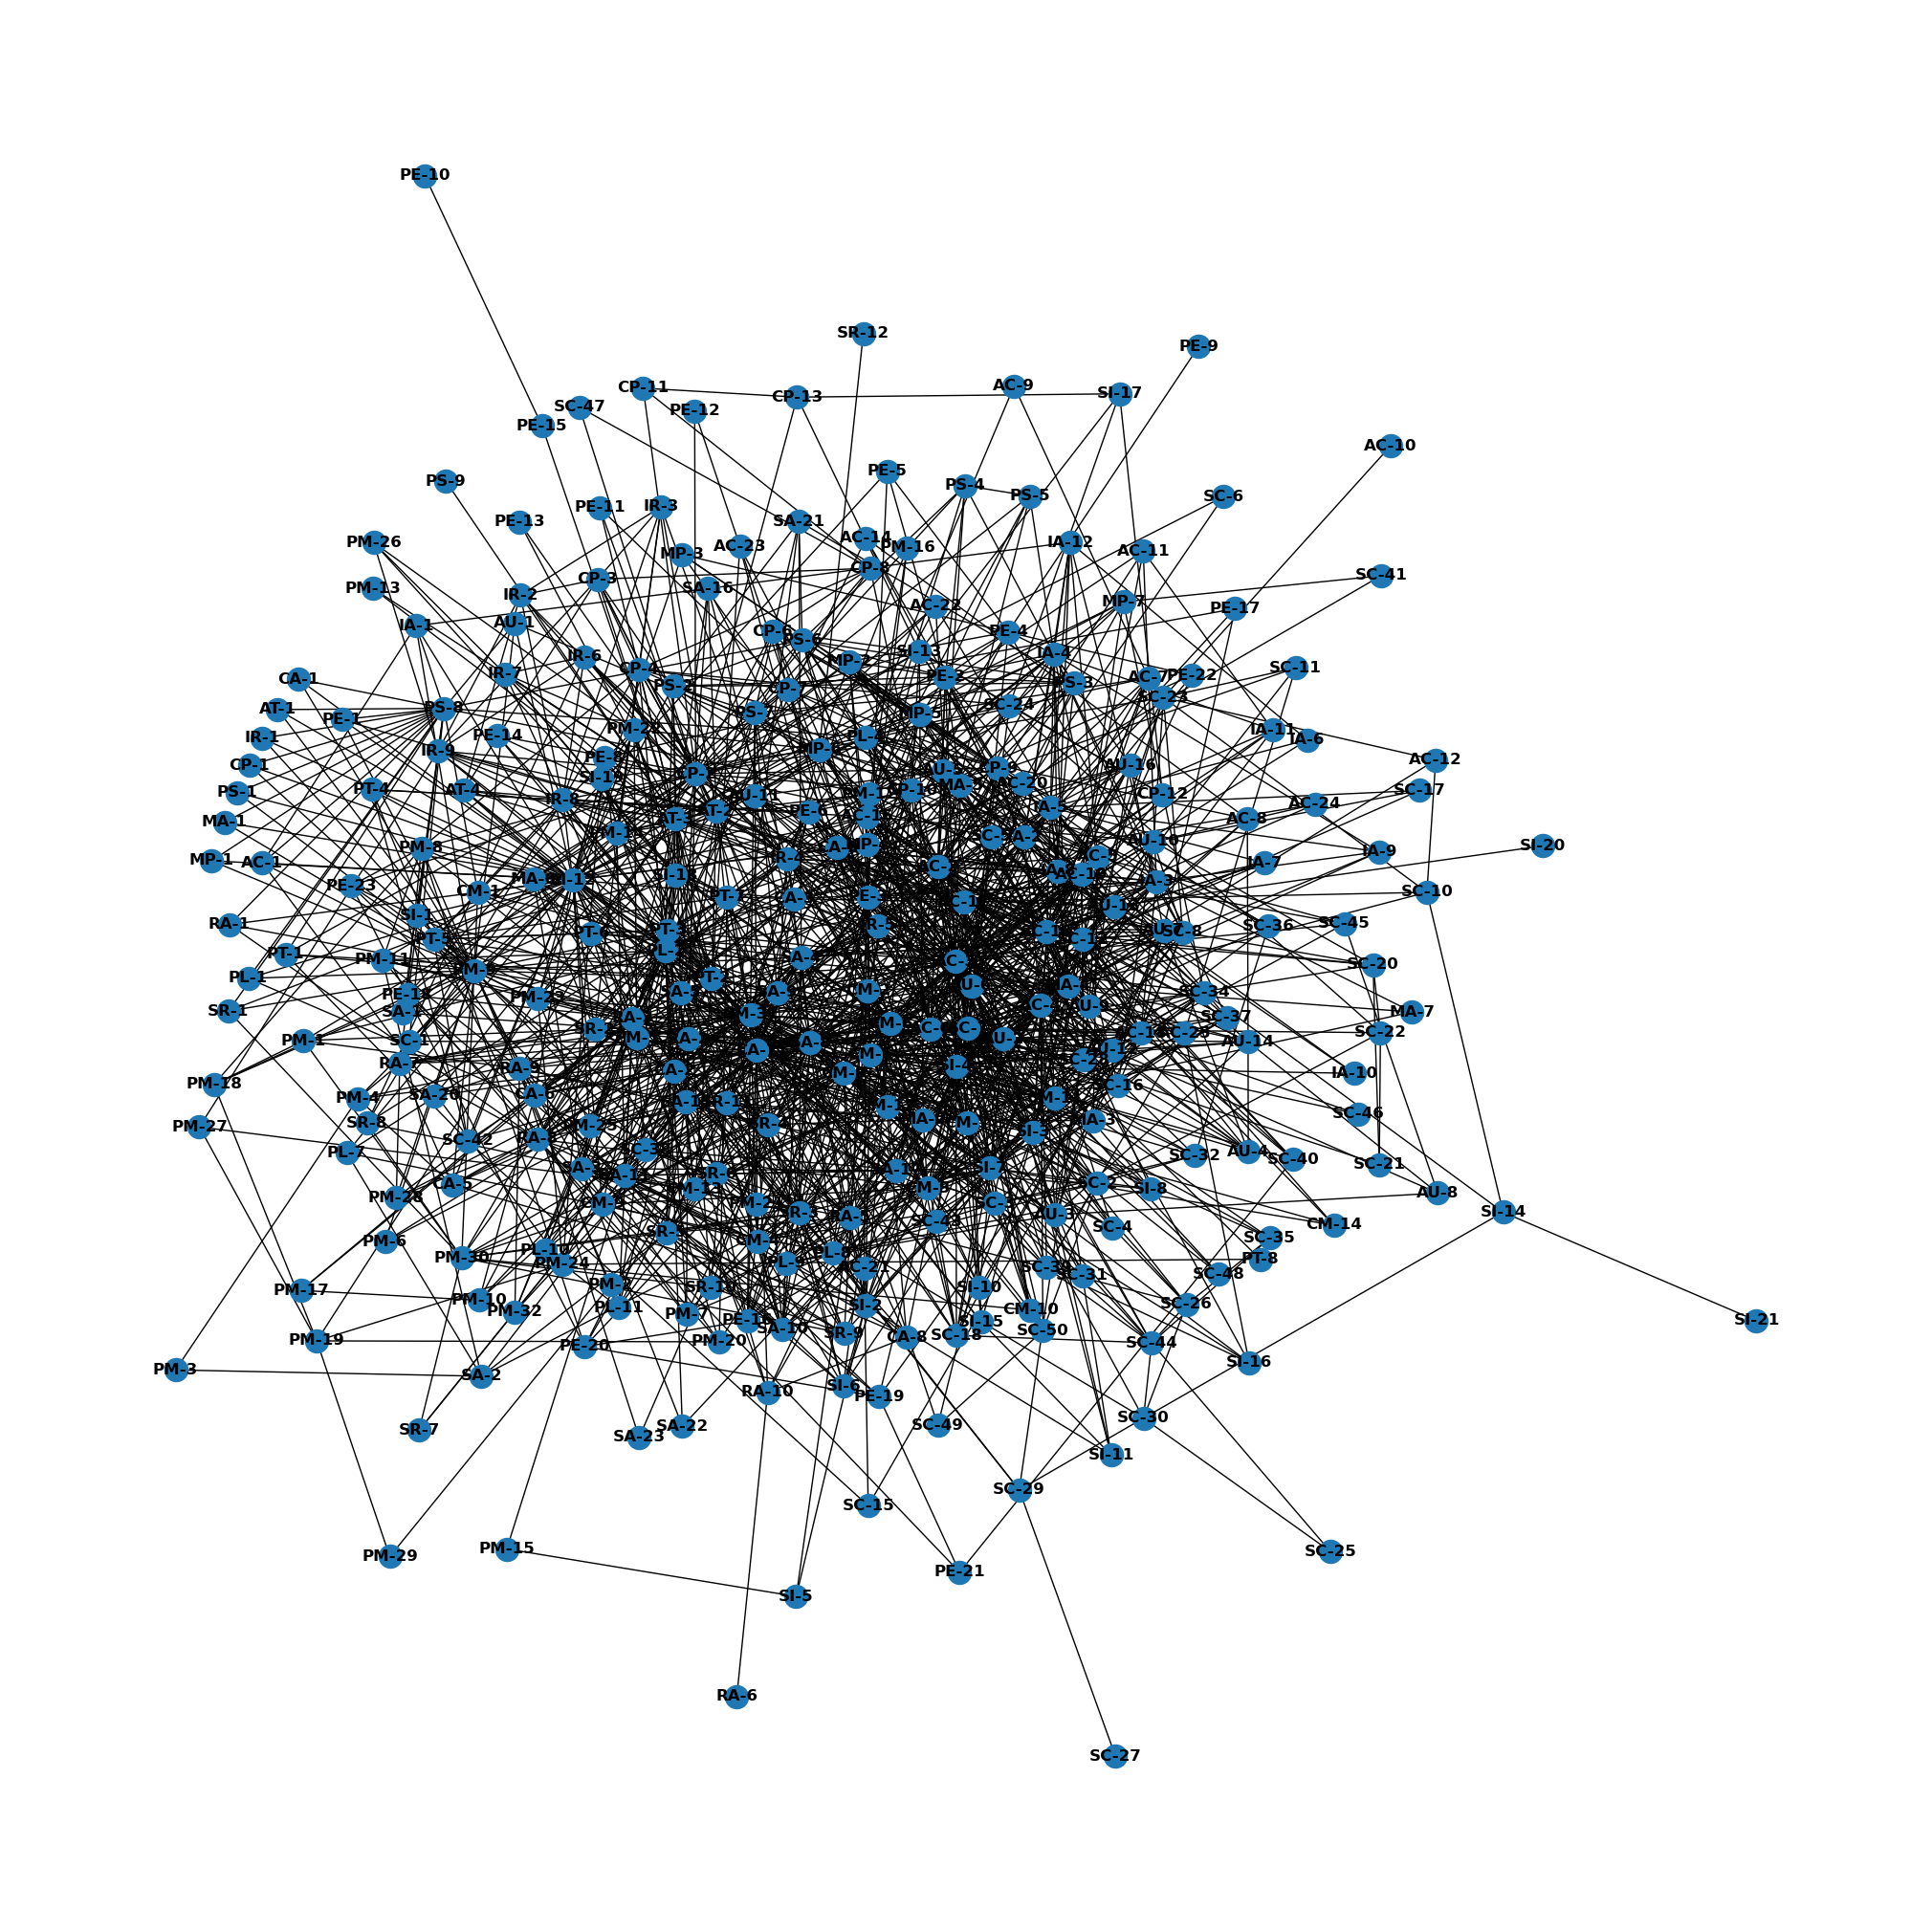

In [28]:


Figure = plt.figure(figsize=(20,20))
if len(connected_component_0.nodes) > 100:
    # nx.draw(connected_component_0, with_labels=True, font_weight='bold',)
    # nx.draw_spring(connected_component_0, with_labels=True, font_weight='bold')
    nx.draw_kamada_kawai(connected_component_0, with_labels=True, font_weight='bold')
else:
    # nx.draw(Related_Controls_Graph, with_labels=True, font_weight='bold',)
    # nx.draw_spring(Related_Controls_Graph, with_labels=True, font_weight='bold')
    nx.draw_kamada_kawai(Related_Controls_Graph, with_labels=True, font_weight='bold')




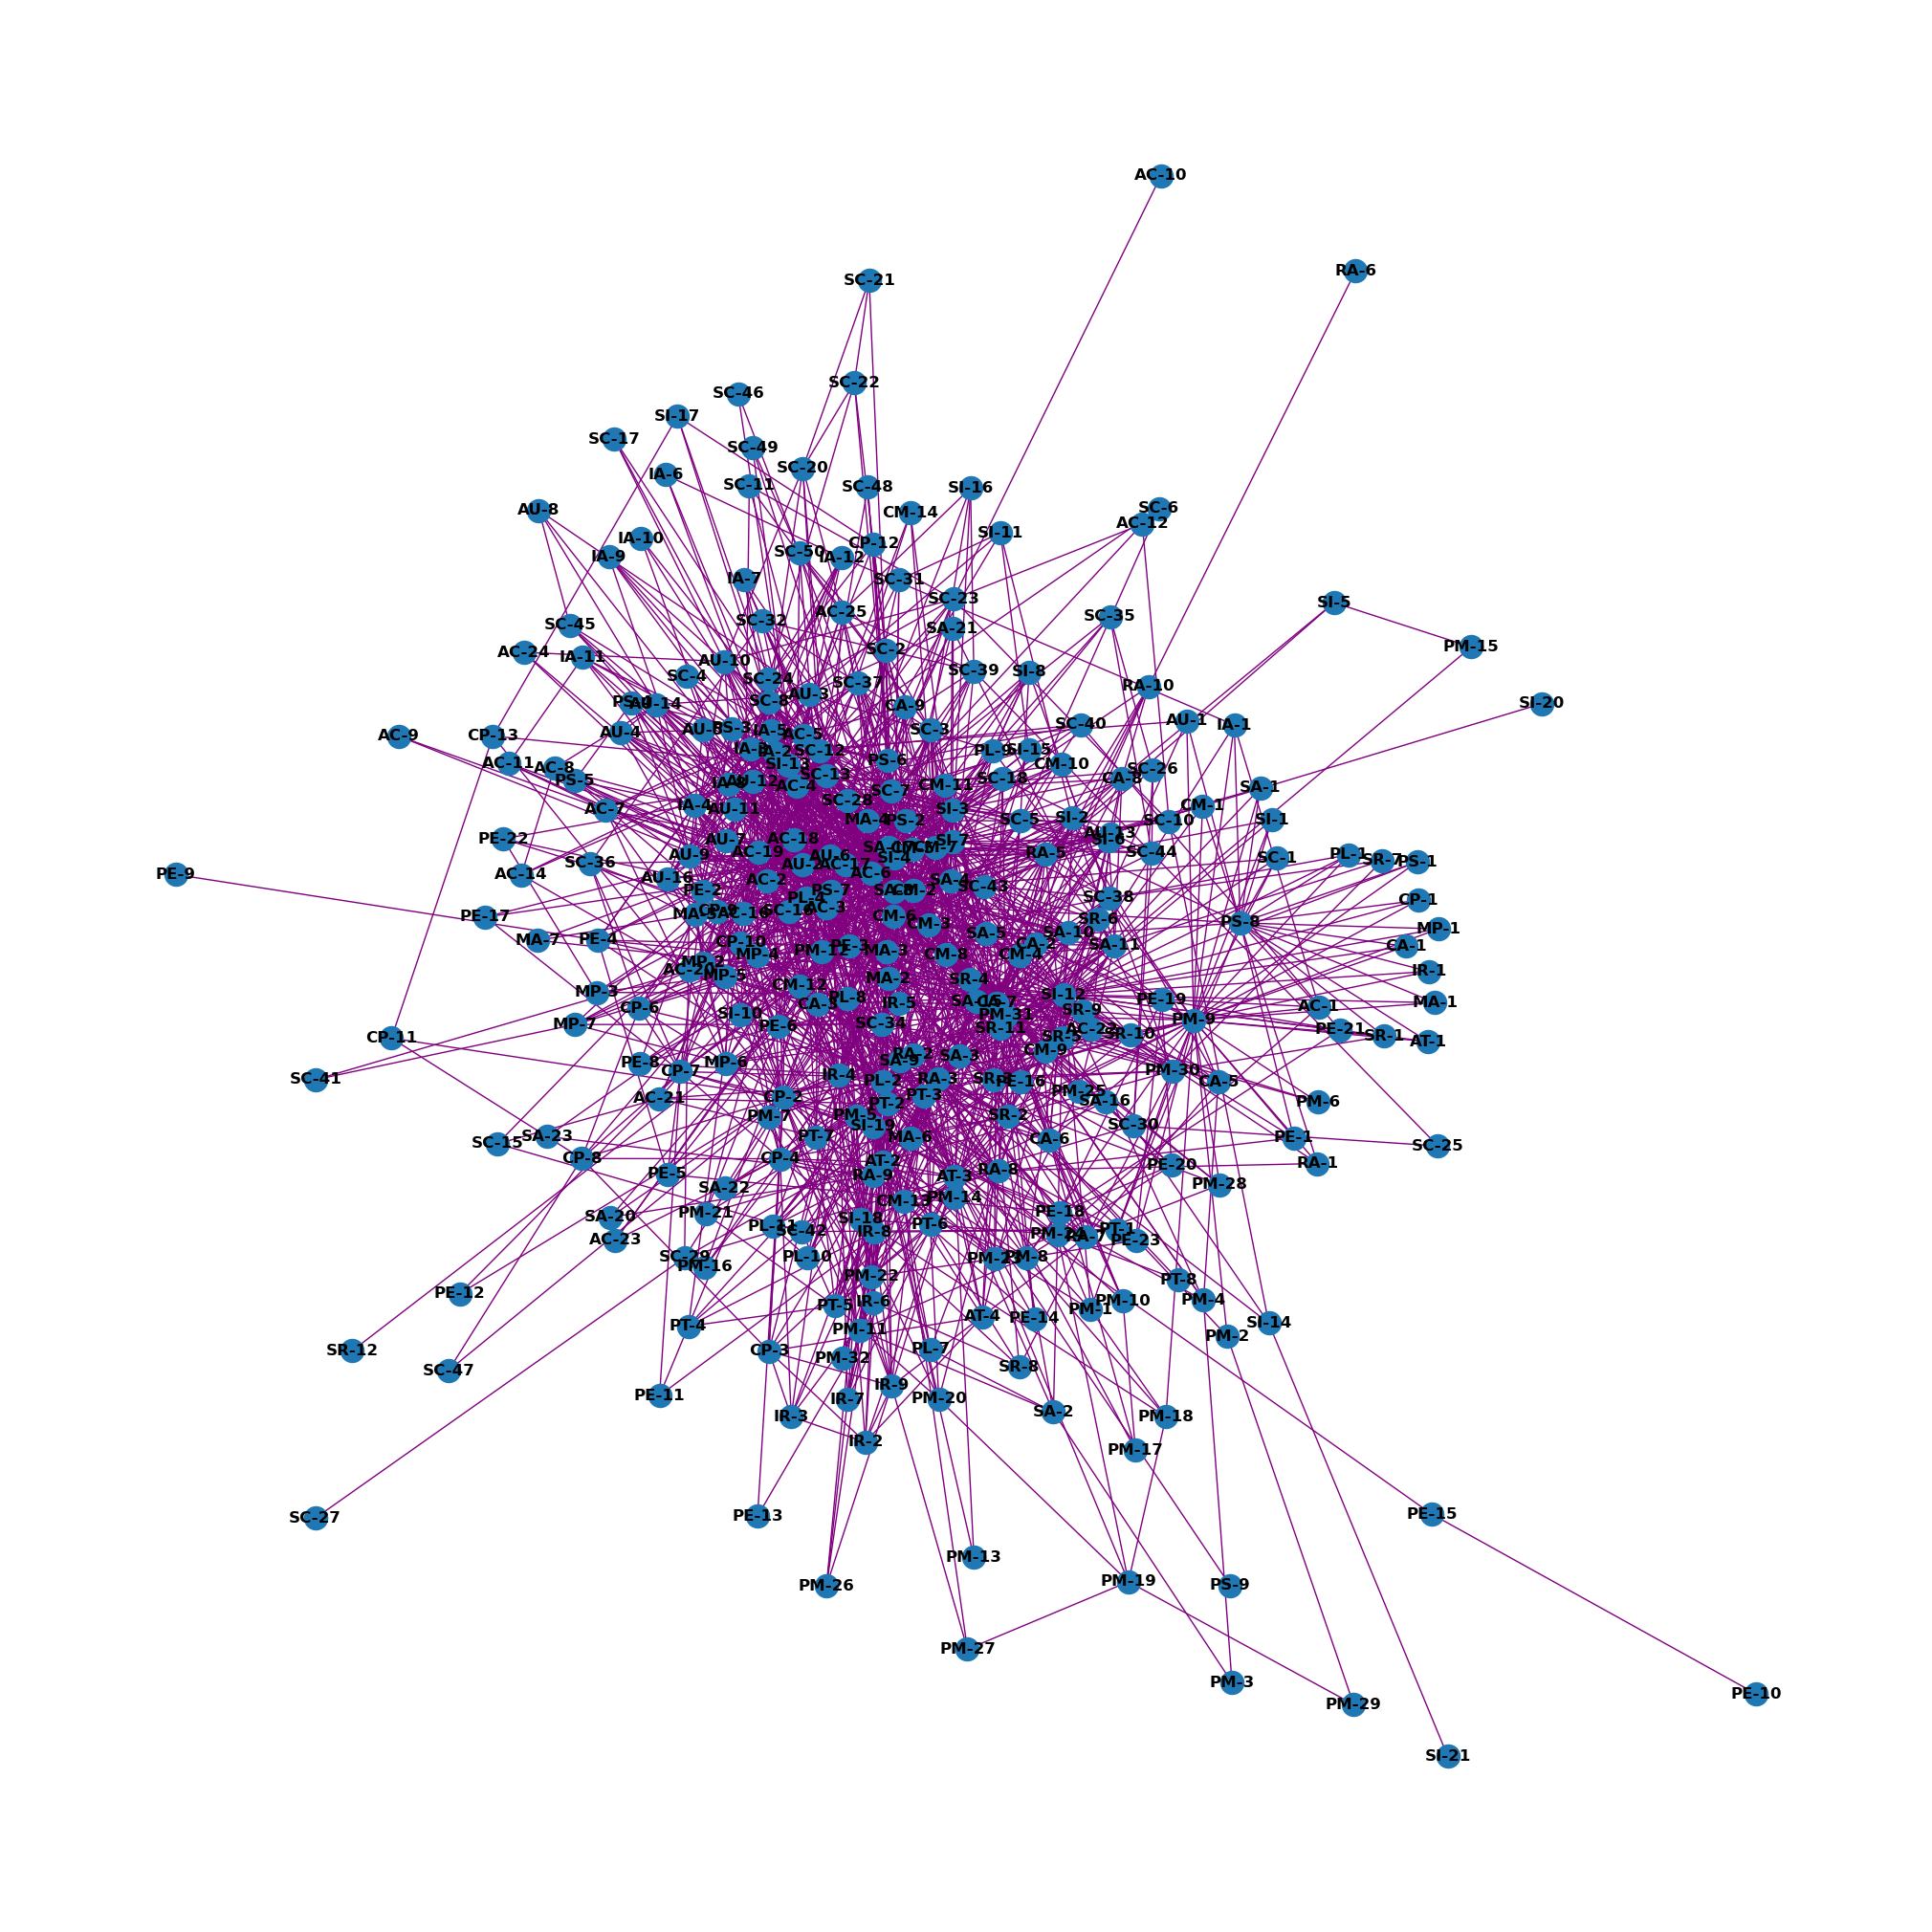

In [29]:

Figure = plt.figure(figsize=(20,20))
if len(connected_component_0.nodes) > 100:
    # nx.draw(connected_component_0, with_labels=True, font_weight='bold',)
    nx.draw_spring(connected_component_0, with_labels=True, font_weight='bold', edge_color='purple')
    # nx.draw_kamada_kawai(connected_component_0, with_labels=True, font_weight='bold')
else:
    # nx.draw(Related_Controls_Graph, with_labels=True, font_weight='bold',)
    nx.draw_spring(Related_Controls_Graph, with_labels=True, font_weight='bold', edge_color='purple')
    # nx.draw_kamada_kawai(Related_Controls_Graph, with_labels=True, font_weight='bold')



(at least for me) it is hard to see defiant clusters in the connected_component_0 images.

but in the data we are told that there are 20 families in it?!

so where are the families? and are the families real (or are they just a wrong assumption of the creators)?

### try to look for clusters inside the big connected component

we want to argue that for our definition of a good true family (that members of the family are more connected to other members of their own family than members of other families) families should be clustered together in the graph and so we should be able to "rediscover" the families by finding clusters in the graph

We need to say that in the graph world clustering is analogs to community discovery, so we will use community algorithms for this task

In [30]:

# helper functions:

def print_communities_results(communities, regulations_DataFrame:pd.DataFrame, max_nodes_to_print:int=20, **kwargs):
    # print how many communities there are
    if 'k' in kwargs.keys():
        print(f"there are {kwargs['k']} Communities")
    elif 'num_communities' in kwargs.keys():
        print(f"there are {kwargs['num_communities']} Communities")
    else:
        try:
            print(f"there are {len(communities)} Communities")
        except Exception as e: 
            print(e)
    
    # print each Community
    for i,Community in enumerate(communities):
        print(f"\nCommunity {i} if of length {len(Community)}\nand contains:")
        if Aggregate_sub_Controls:
            print(regulations_DataFrame.loc[regulations_DataFrame["Control Identifier"].isin(Community)].drop_duplicates(["Main Control Name","Family Name"]).value_counts(["Family Name"]))
        else:
            print(regulations_DataFrame.loc[regulations_DataFrame["Control Identifier"].isin(Community)].value_counts(["Family Name"]))
        if len(Community) <= max_nodes_to_print:
            print(Community)

    return


def write_communities_in_regulations(communities, regulations_DataFrame:pd.DataFrame, **kwargs):

    if "communities_name" not in kwargs.keys():
        communities_name = "new communities"
    else:
        communities_name = kwargs["communities_name"]
    if "node_column" not in kwargs.keys():
        node_column = "Control Identifier"
    else:
        node_column = kwargs["node_column"]

    for i,Community in enumerate(communities):
        # regulations_DataFrame.loc[Community,communities_name] = i
        regulations_DataFrame.loc[regulations_DataFrame[node_column].isin(Community),communities_name] = i

    return regulations_DataFrame

def print_and_write_communities_results(communities, regulations_DataFrame:pd.DataFrame, max_nodes_to_print:int=20, **kwargs):
    
    if "communities_name" not in kwargs.keys():
        communities_name = "new communities"
    else:
        communities_name = kwargs["communities_name"]
    if "node_column" not in kwargs.keys():
        node_column = "Control Identifier"
    else:
        node_column = kwargs["node_column"]

    # print how many communities there are
    if 'k' in kwargs.keys():
        print(f"there are {kwargs['k']} Communities")
    elif 'num_communities' in kwargs.keys():
        print(f"there are {kwargs['num_communities']} Communities")
    else:
        try:
            print(f"there are {len(communities)} Communities")
        except Exception as e: 
            print(e)
    
    # print each Community
    for i,Community in enumerate(communities):
        # write the new Community
        regulations_DataFrame.loc[regulations_DataFrame[node_column].isin(Community),communities_name] = i

        # print the new Community
        print(f"\nCommunity {i} if of length {len(Community)}\nand contains:")
        if Aggregate_sub_Controls:
            print(regulations_DataFrame.loc[regulations_DataFrame["Control Identifier"].isin(Community)].drop_duplicates(["Main Control Name","Family Name"]).value_counts(["Family Name"]))
        else:
            print(regulations_DataFrame.loc[regulations_DataFrame["Control Identifier"].isin(Community)].value_counts(["Family Name"]))
        if len(Community) <= max_nodes_to_print:
            print(Community)
    return regulations_DataFrame
# print_communities_results(Modularity_based_communities,Active_NIS_regulations,max_nodes_to_print=30)



#### k_components

not doing what we want

In [31]:


# if nx.is_directed(connected_component_0):
#     # connected_component_0 = connected_component_0.remove_edges_from(nx.selfloop_edges(connected_component_0))
#     k_components = nx.algorithms.approximation.k_components(nx.to_undirected(connected_component_0))
#     # list(nx.selfloop_edges(connected_component_0))
# else:
#     # connected_component_0 = connected_component_0.remove_edges_from(nx.selfloop_edges(connected_component_0))
#     k_components = nx.algorithms.approximation.k_components(connected_component_0)
#     # list(nx.selfloop_edges(connected_component_0))


In [32]:
# k_components
# print(f"number of k_components is {len(k_components)}")
# for i in range(len(k_components)):
#     if len(k_components[i]) > 0:
#         print(f"k_components of level {i} is of size {len(k_components[i][0])} \nand it contains:\n")
#         if Aggregate_sub_Controls:
#             print(Active_NIS_regulations.loc[Active_NIS_regulations["Control Identifier"].isin(k_components[i][0])].drop_duplicates(["Main Control Name","Family Name"]).value_counts(["Family Name"]))
#         else:
#             print(Active_NIS_regulations.loc[Active_NIS_regulations["Control Identifier"].isin(k_components[i][0])].value_counts(["Family Name"]))

#     # print(f"{i} k_components is of size {len(k_components[i])}")
#     if len(k_components[i]) > 0:
#         k_i = i



#### Bipartitions

In [33]:

if nx.is_directed(connected_component_0):
    if Add_Weights:
        Bipartition = nx.community.kernighan_lin_bisection(nx.to_undirected(connected_component_0), weight='Weight')
    else:
        Bipartition = nx.community.kernighan_lin_bisection(nx.to_undirected(connected_component_0))
else:
    if Add_Weights:
        Bipartition = nx.community.kernighan_lin_bisection(connected_component_0, weight='Weight')
    else:
        Bipartition = nx.community.kernighan_lin_bisection(connected_component_0)
# nx.community.kernighan_lin_bisection(connected_component_)
Bipartition

print_communities_results(Bipartition,Active_NIS_regulations,max_nodes_to_print=30)




there are 2 Communities

Community 0 if of length 146
and contains:
Family Name
PM             28
SC             20
PE             17
SI             12
CP             10
AC              9
PT              8
IR              7
RA              7
SA              5
AT              4
PS              3
CA              3
SR              3
MA              2
MP              2
PL              2
AU              2
IA              1
CM              1
Name: count, dtype: int64

Community 1 if of length 147
and contains:
Family Name
SC             26
AC             14
AU             13
CM             13
SA             11
IA             11
SR              9
SI              8
PL              6
PS              6
MA              5
MP              5
CA              5
PE              5
PM              4
IR              2
RA              2
CP              2
Name: count, dtype: int64


#### Divisive Communities

taking to much time and gives trivial results

In [34]:

# # k = 10
# k = Active_NIS_regulations["Family Name"].nunique()

# if nx.is_directed(connected_component_0):
#     if Add_Weights:
#         Divisive_Communities = nx.community.edge_betweenness_partition(nx.to_undirected(connected_component_0),k, weight='Weight')
#         # Divisive_Communities = nx.community.edge_current_flow_betweenness_partition(nx.to_undirected(connected_component_0),k, weight='Weight')
#     else:
#         Divisive_Communities = nx.community.edge_betweenness_partition(nx.to_undirected(connected_component_0),k)
#         # Divisive_Communities = nx.community.edge_current_flow_betweenness_partition(nx.to_undirected(connected_component_0),k)
# else:
#     if Add_Weights:
#         Divisive_Communities = nx.community.edge_betweenness_partition(connected_component_0,k, weight='Weight')
#         # Divisive_Communities = nx.community.edge_current_flow_betweenness_partition(connected_component_0,k, weight='Weight')
#     else:
#         Divisive_Communities = nx.community.edge_betweenness_partition(connected_component_0,k)
#         # Divisive_Communities = nx.community.edge_current_flow_betweenness_partition(connected_component_0,k)


# print_communities_results(Divisive_Communities,Active_NIS_regulations,max_nodes_to_print=30)



#### Modularity-based communities

In [35]:

if Add_Weights:
    Modularity_based_communities = nx.community.greedy_modularity_communities(connected_component_0, weight='Weight')
else:
    Modularity_based_communities = nx.community.greedy_modularity_communities(connected_component_0)


if Only_Main_Controls:    
    Active_NIS_regulations = print_and_write_communities_results(Modularity_based_communities,Active_NIS_regulations.copy(),max_nodes_to_print=30,communities_name="Modularity_based_communities",node_column = "Main Control Name")
    mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics = get_mutual_relations(Active_NIS_regulations, name_column = "Main Control Name", family_column = "Modularity_based_communities", do_print = False)
else:
    Active_NIS_regulations = print_and_write_communities_results(Modularity_based_communities,Active_NIS_regulations.copy(),max_nodes_to_print=30,communities_name="Modularity_based_communities",node_column = "Control Identifier")
    mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics = get_mutual_relations(Active_NIS_regulations, name_column = "Control Identifier", family_column = "Modularity_based_communities", do_print = False)
    
# print_communities_results(Modularity_based_communities,Active_NIS_regulations,max_nodes_to_print=30)

# print(f"there are {len(not_mutually_related)} non-mutual connections")

print(f"the in_family_connection_ratios are: {in_family_connection_statistics['empiric connection ratio 1 (total/total)']:.3} , {in_family_connection_statistics['empiric connection ratio 2 (mean ratio per family)']:.3}")

# not_mutually_related
Modularity_based_communities_relations_statistics = relations_statistics # prepare for output file
in_family_connection_statistics


there are 7 Communities

Community 0 if of length 78
and contains:
Family Name
SC             25
CM             11
CP             11
SI              9
PE              5
MP              4
IR              3
AC              2
AU              2
MA              2
PL              1
PM              1
RA              1
SR              1
Name: count, dtype: int64

Community 1 if of length 71
and contains:
Family Name
AC             18
AU             12
IA             11
PE              7
SC              5
PS              4
MA              3
SI              3
CA              2
PM              2
PT              2
MP              1
PL              1
Name: count, dtype: int64

Community 2 if of length 71
and contains:
Family Name
PM             17
SA             15
SR              9
RA              7
CA              5
PL              5
PE              4
AT              3
PS              3
MA              1
SC              1
SI              1
Name: count, dtype: int64

Community 3 if of length 51
an

number of families                                                                7.000000
number of participating controls                                                293.000000
same family connections                                                        1812.000000
out of family connections                                                      1355.000000
empiric connection ratio 1 (total/total)                                          1.337269
empiric connection ratio 2 (mean ratio per family)                                1.076937
percentage of possible in-family connections exists 1 (total/total)               0.097210
percentage of possible in-family connections exists 2 (mean per family)           0.188231
percentage of possible out of family connections exist 1 (total/total)            0.020249
percentage of possible out of family connections exists 2 (mean per family)       0.016357
statistical connection ratio 1 (ratio of total/total)                             4.800682

In [36]:

# prepare for output file
in_family_connection_statistics_test.loc[:,"Modularity based communities"] = in_family_connection_statistics


In [37]:

print(f'same family connections = {relations_statistics["actual inside relations"].sum()}')
print(f'out of family connections = {relations_statistics["actual outside relations"].sum()}')

print(f'percentage of possible in-family connections exists = {relations_statistics["actual inside relations"].sum()/relations_statistics["possible inside relations"].sum()}')
print(f'percentage of possible out of family connections exists = {relations_statistics["actual outside relations"].sum()/relations_statistics["possible outside relations"].sum()}')

relations_statistics


same family connections = 1812
out of family connections = 1355
percentage of possible in-family connections exists = 0.09721030042918455
percentage of possible out of family connections exists = 0.02024926773865742


number of regulations  \
Modularity_based_communities                          
0.0                                              78   
1.0                                              71   
2.0                                              71   
3.0                                              51   
4.0                                               9   
5.0                                               7   
6.0                                               6   

                                                           names of regulations  \
Modularity_based_communities                                                      
0.0                           [AC-10, AC-19, AU-9, AU-10, CM-2, CM-3, CM-4, ...   
1.0                           [AC-2, AC-3, AC-4, AC-5, AC-6, AC-7, AC-8, AC-...   
2.0                           [AT-2, AT-3, AT-4, CA-2, CA-5, CA-6, CA-7, CA-...   
3.0                           [AC-1, AC-23, AT-1, AU-1, CA-1, CM-1, CM-12, C...   
4.0                           [AC-25, SC-2, SC-3, SC-11, SC-32, SC-39, SC-49...   
5.0                            [PE-18, PE-19, PE-20, PE-21, PE-23, PM-8, SC-40]   
6.0                                  [SC-25, SC-27, SC-29, SC-30, SI-14, SI-21]   

                             possible inside relations  \
Modularity_based_communities                             
0.0                                               6006   
1.0                                               4970   
2.0                                               4970   
3.0                                               2550   
4.0                                                 72   
5.0                                                 42   
6.0                                                 30   

                             actual inside relations  \
Modularity_based_communities                           
0.0                                              595   
1.0                                              520   
2.0                                              491   
3.0                                              160   
4.0                                               24   
5.0                                               12   
6.0                                               10   

                             percentage inside relations  \
Modularity_based_communities                               
0.0                                             0.099068   
1.0                                             0.104628   
2.0                                             0.098793   
3.0                                             0.062745   
4.0                                             0.333333   
5.0                                             0.285714   
6.0                                             0.333333   

                             possible outside relations  \
Modularity_based_communities                              
0.0                                               16770   
1.0                                               15762   
2.0                                               15762   
3.0                                               12342   
4.0                                                2556   
5.0                                                2002   
6.0                                                1722   

                             actual outside relations  \
Modularity_based_communities                            
0.0                                               400   
1.0                                               337   
2.0                                               376   
3.0                                               172   
4.0                                                39   
5.0                                                22   
6.0                                                 9   

                             percentage outside relations  \
Modularity_based_communities                                
0.0                                              

#### Label propagation

In [38]:

if Add_Weights:
    Label_propagation = nx.community.asyn_lpa_communities(connected_component_0, weight='Weight')
    # Label_propagation = nx.community.label_propagation_communities(connected_component_0)
    # Label_propagation = nx.community.fast_label_propagation_communities(connected_component_0, weight='Weight')
else:
    Label_propagation = nx.community.asyn_lpa_communities(connected_component_0)
    # Label_propagation = nx.community.label_propagation_communities(connected_component_0)
    # Label_propagation = nx.community.fast_label_propagation_communities(connected_component_0)


print_communities_results(Label_propagation,Active_NIS_regulations,max_nodes_to_print=30)


object of type 'generator' has no len()

Community 0 if of length 291
and contains:
Family Name
SC             46
PM             32
AC             23
SI             20
PE             20
SA             16
AU             15
CM             14
CP             12
IA             12
SR             12
IR              9
PS              9
RA              9
PL              8
PT              8
CA              8
MA              7
MP              7
AT              4
Name: count, dtype: int64

Community 1 if of length 2
and contains:
Family Name
PE             2
Name: count, dtype: int64
{'PE-10', 'PE-15'}


#### Louvain Community Detection

In [39]:

if Add_Weights:
    Louvain_Communities = nx.community.louvain_communities(connected_component_0, weight='Weight')
else:
    Louvain_Communities = nx.community.louvain_communities(connected_component_0)


if Only_Main_Controls:    
    Active_NIS_regulations = print_and_write_communities_results(Louvain_Communities,Active_NIS_regulations.copy(),max_nodes_to_print=30,communities_name="Louvain_Communities",node_column = "Main Control Name")
    mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics = get_mutual_relations(Active_NIS_regulations, name_column = "Main Control Name", family_column = "Louvain_Communities", do_print = False)
else:
    Active_NIS_regulations = print_and_write_communities_results(Louvain_Communities,Active_NIS_regulations.copy(),max_nodes_to_print=30,communities_name="Louvain_Communities",node_column = "Control Identifier")
    mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics = get_mutual_relations(Active_NIS_regulations, name_column = "Control Identifier", family_column = "Louvain_Communities", do_print = False)

# print_communities_results(Louvain_Communities,Active_NIS_regulations,max_nodes_to_print=30)

print(f"the in_family_connection_ratios are: {in_family_connection_statistics['empiric connection ratio 1 (total/total)']:.3} , {in_family_connection_statistics['empiric connection ratio 2 (mean ratio per family)']:.3}")

Louvain_Communities_relations_statistics = relations_statistics # prepare for output file
in_family_connection_statistics



there are 7 Communities

Community 0 if of length 49
and contains:
Family Name
SC             13
AC             12
MP              6
AU              3
IA              3
PE              3
SI              3
CA              2
CM              1
CP              1
PL              1
SR              1
Name: count, dtype: int64

Community 1 if of length 24
and contains:
Family Name
PM             3
SI             2
PS             2
AC             1
AT             1
SC             1
SA             1
RA             1
PT             1
PL             1
PE             1
MP             1
MA             1
IR             1
IA             1
CP             1
CM             1
CA             1
AU             1
SR             1
Name: count, dtype: int64
{'SR-1', 'CP-1', 'CA-1', 'SI-1', 'PE-1', 'CM-1', 'IA-1', 'PM-9', 'SC-1', 'SI-12', 'PS-1', 'PT-1', 'RA-1', 'IR-1', 'MA-1', 'AU-1', 'MP-1', 'PL-1', 'PM-1', 'AT-1', 'SA-1', 'AC-1', 'PS-8', 'PM-18'}

Community 2 if of length 54
and contains:
Family Name
CM      

number of families                                                                7.000000
number of participating controls                                                293.000000
same family connections                                                        1610.000000
out of family connections                                                      1557.000000
empiric connection ratio 1 (total/total)                                          1.034040
empiric connection ratio 2 (mean ratio per family)                                1.044498
percentage of possible in-family connections exists 1 (total/total)               0.124671
percentage of possible in-family connections exists 2 (mean per family)           0.132417
percentage of possible out of family connections exist 1 (total/total)            0.021434
percentage of possible out of family connections exists 2 (mean per family)       0.020425
statistical connection ratio 1 (ratio of total/total)                             5.816534

In [40]:

# prepare for output file
in_family_connection_statistics_test.loc[:,"Louvain Communities"] = in_family_connection_statistics



#### Fluid Communities

In [41]:

k = Active_NIS_regulations["Family Name"].nunique()

# can't use weighted edges
# if Add_Weights:
#     Fluid_Communities = nx.community.asyn_fluidc(connected_component_0, k, max_iter=10_000, weight='Weight')
# else:
#     Fluid_Communities = nx.community.asyn_fluidc(connected_component_0, k, max_iter=10_000)

# Fluid Communities can only take undirected graphs
if nx.is_directed(connected_component_0):
    Fluid_Communities = nx.community.asyn_fluidc(nx.to_undirected(connected_component_0), k, max_iter=10_000)
else:
    Fluid_Communities = nx.community.asyn_fluidc(connected_component_0, k, max_iter=10_000)


# print_communities_results(Fluid_Communities,Active_NIS_regulations,max_nodes_to_print=30,k=k)
if Only_Main_Controls:    
    Active_NIS_regulations = print_and_write_communities_results(Fluid_Communities,Active_NIS_regulations.copy(),max_nodes_to_print=30,k=k,communities_name="Fluid_Communities",node_column = "Main Control Name")
    mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics = get_mutual_relations(Active_NIS_regulations, name_column = "Main Control Name", family_column = "Fluid_Communities", do_print = False)
else:
    Active_NIS_regulations = print_and_write_communities_results(Fluid_Communities,Active_NIS_regulations.copy(),max_nodes_to_print=30,k=k,communities_name="Fluid_Communities",node_column = "Control Identifier")
    mutually_related, not_mutually_related, in_family_connection_statistics, relations_statistics = get_mutual_relations(Active_NIS_regulations, name_column = "Control Identifier", family_column = "Fluid_Communities", do_print = False)


print(f"the in_family_connection_ratios are: {in_family_connection_statistics['empiric connection ratio 1 (total/total)']:.3} , {in_family_connection_statistics['empiric connection ratio 2 (mean ratio per family)']:.3}")

Fluid_Communities_relations_statistics = relations_statistics # prepare for output file
in_family_connection_statistics



there are 20 Communities

Community 0 if of length 10
and contains:
Family Name
PL             3
PM             3
RA             2
SA             2
Name: count, dtype: int64
{'RA-2', 'PM-32', 'RA-9', 'SA-2', 'PL-7', 'PL-2', 'PL-8', 'PM-11', 'SA-23', 'PM-7'}

Community 1 if of length 19
and contains:
Family Name
AC             6
IA             6
AU             2
MA             2
CM             1
PL             1
SC             1
Name: count, dtype: int64
{'IA-10', 'AC-17', 'CM-10', 'MA-3', 'SC-45', 'AC-14', 'AC-2', 'IA-2', 'AC-18', 'MA-5', 'AU-16', 'IA-4', 'AC-6', 'AC-5', 'IA-12', 'AU-6', 'IA-5', 'IA-8', 'PL-4'}

Community 2 if of length 13
and contains:
Family Name
CA             3
RA             3
SC             3
SI             3
AU             1
Name: count, dtype: int64
{'RA-10', 'CA-2', 'SC-29', 'RA-5', 'CA-8', 'RA-6', 'SI-2', 'CA-7', 'SI-5', 'SI-20', 'SC-27', 'AU-13', 'SC-38'}

Community 3 if of length 21
and contains:
Family Name
SR             8
SA             7
PM             

number of families                                                               20.000000
number of participating controls                                                293.000000
same family connections                                                        1134.000000
out of family connections                                                      2033.000000
empiric connection ratio 1 (total/total)                                          0.557796
empiric connection ratio 2 (mean ratio per family)                                0.553442
percentage of possible in-family connections exists 1 (total/total)               0.260092
percentage of possible in-family connections exists 2 (mean per family)           0.258942
percentage of possible out of family connections exist 1 (total/total)            0.025038
percentage of possible out of family connections exists 2 (mean per family)       0.024763
statistical connection ratio 1 (ratio of total/total)                            10.387806

In [42]:

# prepare for output file
in_family_connection_statistics_test.loc[:,"Fluid Communities"] = in_family_connection_statistics



#### Partitions via centrality measures

In [43]:


# can't use weighted edges
# if Add_Weights:
#     centrality_Communities = nx.community.girvan_newman(connected_component_0, weight='Weight')
# else:
#     centrality_Communities = nx.community.girvan_newman(connected_component_0)

centrality_Communities = nx.community.girvan_newman(connected_component_0)


In [44]:

k = Active_NIS_regulations["Family Name"].nunique()

# print(len(centrality_Communities))
for Communities in centrality_Communities:
    print(len(Communities))
    if len(Communities) < k:
        print(Communities)
    elif len(Communities) == k:
        print(Communities)
        break
# print(len(centrality_Communities[0]))
# print(len(centrality_Communities[1]))

print_communities_results(Communities,Active_NIS_regulations,max_nodes_to_print=30)



2
({'SC-10', 'SC-29', 'PM-4', 'PM-31', 'PE-18', 'SI-13', 'AC-1', 'IA-10', 'SI-1', 'AU-7', 'PM-21', 'SR-7', 'PM-8', 'PM-23', 'SA-2', 'AC-3', 'MA-6', 'CP-4', 'AC-7', 'AU-5', 'SC-1', 'SC-7', 'PE-5', 'PM-24', 'AC-4', 'SC-24', 'PE-13', 'AC-14', 'CP-9', 'SC-15', 'MP-2', 'PE-14', 'CM-13', 'MP-1', 'PL-1', 'SC-36', 'AU-3', 'IA-6', 'SA-10', 'AC-11', 'SA-16', 'SC-40', 'AT-2', 'PS-5', 'MP-4', 'CA-7', 'CM-7', 'SC-32', 'CM-3', 'MP-3', 'PE-4', 'SA-15', 'SR-1', 'SC-26', 'SC-2', 'SI-7', 'SC-42', 'IA-2', 'PM-14', 'SI-2', 'PM-29', 'CP-2', 'CM-1', 'PL-2', 'IR-8', 'PL-8', 'PM-13', 'SC-37', 'SI-3', 'AU-2', 'AU-6', 'MP-6', 'PS-2', 'CA-8', 'PM-16', 'PM-18', 'SC-18', 'AU-14', 'SR-4', 'PM-25', 'SC-46', 'PT-8', 'SC-23', 'SR-12', 'PM-2', 'CM-11', 'PM-9', 'IA-7', 'SC-6', 'MA-7', 'PE-2', 'IA-9', 'PT-3', 'SC-44', 'SA-5', 'CA-3', 'SC-50', 'SC-48', 'AC-2', 'AT-1', 'CP-10', 'SI-4', 'AC-16', 'CM-5', 'CP-6', 'RA-7', 'AU-4', 'PS-8', 'IA-11', 'SC-17', 'SC-5', 'MP-5', 'AC-25', 'PM-26', 'AC-8', 'PM-17', 'CM-12', 'SR-2', 'CP-

#### Communities conclusion 

after no one of the Communities Detection methods could rediscover the families from the connection graph, we can only conclude that the families comes from the minds of the experts that made them but are not an inherent concept of the regulations themselves.

and from the Communities Detection methods checked, "Modularity-based communities" and "Louvain Community Detection" worked best for not needing to know the number of communities and giving the most balanced output in the area of communities sizes.

"Fluid Communities" is also to note for its balanced communities sizes output but it has the need for an input of the number of communities, that we want to avoid.

the "Modularity-based communities" is also preferable because it gives consistent result, while the "Louvain Community Detection" and "Fluid Communities" have a random element in them that gives somewhat different results at each run

In [45]:

# write the output file

# in_family_connection_statistics_test.to_excel("in family connection statistics test.xlsx", sheet_name="methods comparison",merge_cells=False,freeze_panes=(1,1))
# in_family_connection_statistics_test


with pd.ExcelWriter('regulations outputs\\in family connection statistics test.xlsx') as writer:  
    in_family_connection_statistics_test.to_excel(writer, sheet_name="methods comparison",merge_cells=False,freeze_panes=(1,1))
    NIS_relations_statistics.to_excel(writer, sheet_name="original NIS statistics",merge_cells=False,freeze_panes=(1,1))
    Modularity_based_communities_relations_statistics.to_excel(writer, sheet_name="Modularity statistics",merge_cells=False,freeze_panes=(1,1))
    Louvain_Communities_relations_statistics.to_excel(writer, sheet_name="Louvain statistics",merge_cells=False,freeze_panes=(1,1))
    Fluid_Communities_relations_statistics.to_excel(writer, sheet_name="Fluid statistics",merge_cells=False,freeze_panes=(1,1))

in_family_connection_statistics_test


NIS800-53 families  \
number of families                                           20.000000   
number of participating controls                            298.000000   
same family connections                                     785.000000   
out of family connections                                  2382.000000   
empiric connection ratio 1 (total/total)                      0.329555   
empiric connection ratio 2 (mean ratio per family)            0.319256   
percentage of possible in-family connections ex...            0.128394   
percentage of possible in-family connections ex...            0.236464   
percentage of possible out of family connection...            0.028911   
percentage of possible out of family connection...            0.030499   
statistical connection ratio 1 (ratio of total/...            4.441069   
statistical connection ratio 2 (ratio of mean p...            7.753133   
statistical connection ratio 3 (mean of the rat...            8.193504   

                                                    Modularity based communities  \
number of families                                                      7.000000   
number of participating controls                                      293.000000   
same family connections                                              1812.000000   
out of family connections                                            1355.000000   
empiric connection ratio 1 (total/total)                                1.337269   
empiric connection ratio 2 (mean ratio per family)                      1.076937   
percentage of possible in-family connections ex...                      0.097210   
percentage of possible in-family connections ex...                      0.188231   
percentage of possible out of family connection...                      0.020249   
percentage of possible out of family connection...                      0.016357   
statistical connection ratio 1 (ratio of total/...                      4.800682   
statistical connection ratio 2 (ratio of mean p...                     11.507813   
statistical connection ratio 3 (mean of the rat...                     18.473526   

                                                    Louvain Communities  \
number of families                                             7.000000   
number of participating controls                             293.000000   
same family connections                                     1610.000000   
out of family connections                                   1557.000000   
empiric connection ratio 1 (total/total)                       1.034040   
empiric connection ratio 2 (mean ratio per family)             1.044498   
percentage of possible in-family connections ex...             0.124671   
percentage of possible in-family connections ex...             0.132417   
percentage of possible out of family connection...             0.021434   
percentage of possible out of family connection...             0.020425   
statistical connection ratio 1 (ratio of total/...             5.816534   
statistical connection ratio 2 (ratio of mean p...             6.483245   
statistical connection ratio 3 (mean of the rat...             7.219834   

                                                    Fluid Communities  
number of families                                          20.000000  
number of participating controls                           293.000000  
same family connections                                   1134.000000  
out of family connections                                 2033.000000  
empiric connection ratio 1 (total/total)                     0.557796  
empiric connection ratio 2 (mean ratio per family)           0.553442  
percentage of possible in-family connections ex...           0.260092  
percentage of possible in-family connections ex...           0.258942  
percentage of possible out of family connection...           0.025038  
percentage of possible out of family connection...           0.0247

diving more into the data from the three best community methods:

* the **Modularity based communities** - it gives the best *empiric connection ratios*, 
and wins over the **NIS800-53 families** in all of the *statistical connection ratios*
* the **Louvain Communities** - it beats the **NIS800-53 families** in *empiric connection ratios* by a factor of 3, 
but can have scores less then it in the *statistical connection ratios* when calculating as the ratio of the mean percentages in/out (statistical connection ratio 2) and when calculating as the mean of ratio of percentages per family in/out (statistical connection ratio 3), 
but it is better when calculating as the ratio between the ratio of total existing to possible in-family connections to the ratio of total existing to possible out of family connections (statistical connection ratio 1)
* the **Fluid Communities** - beats the **NIS800-53 families** in *empiric connection ratios* by a little, 
and beats it by a lot in all of the *statistical connection ratios* getting best scores of all in *statistical connection ratio 1*

the results are similar for all choices of directed or undirected graph and for weighted or unweighted edges

and the conclusions still stands if we take the sub-controls as separate units and not incorporate them into their main control, although in this case we get more communities when not specified by the algorithm, and main controls are sometimes separated from their sub-controls in the new communities/families

this things strengthens our conclusions about the NIS800-53 families


we will consider the default mode to be an undirected weighted graph, because we think that relation between regulations should be mutual but can still be stronger or weaker, 
and to incorporate the sub-controls with the main control because we see it as the spirit of the regulations authors

## look for vertex covers and dominating sets on the Related_Controls_Graph
having 298 Controls and 709 sub-Controls to go over is a lot.
so we want to choose a sub-set of them that will best represent the whole, and do it in a smart way.

because we have data on the relations between controls and we have made a Related_Controls_Graph, we can say that this problem is similar to the problems of finding a vertex cover or dominating sets on the Related_Controls_Graph.
we can say that because if two controls are close enough (by a metric of are choosing) we can decide to choose only one of the controls and say that the answer on the control that we didn't choose will be close enough because of the closeness between the two controls.

choosing a dominating set on the Related_Controls_Graph means for us that we want to choose a sub-set of the controls such that any control that is not in the dominating set will be close enough to at least one of the controls that is in the dominating set.

and choosing a vertex cover set on the Related_Controls_Graph means for us that we want to choose a sub-set of the controls such that any control that is not in the cover set will have all of its relations covered by at least one of the controls that is in the cover set.

<!-- ### Maximal independent set
An independent set is a set of nodes such that the subgraph of G induced by these nodes contains no edges. A maximal independent set is an independent set such that it is not possible to add a new node and still get an independent set. -->

### Vertex Cover
A vertex cover is a subset of nodes such that each edge in the graph is incident to at least one node in the subset.

In [46]:

if Add_Weights:
    Vertex_Cover = nx.approximation.min_weighted_vertex_cover(Related_Controls_Graph, weight='Weight')
else:
    Vertex_Cover = nx.approximation.min_weighted_vertex_cover(Related_Controls_Graph)
print(len(Vertex_Cover))
Vertex_Cover


229


{'AC-1',
 'AC-10',
 'AC-11',
 'AC-12',
 'AC-14',
 'AC-16',
 'AC-17',
 'AC-18',
 'AC-19',
 'AC-2',
 'AC-20',
 'AC-21',
 'AC-22',
 'AC-23',
 'AC-24',
 'AC-25',
 'AC-3',
 'AC-4',
 'AC-5',
 'AC-6',
 'AC-7',
 'AC-8',
 'AC-9',
 'AT-1',
 'AT-2',
 'AT-3',
 'AT-4',
 'AU-1',
 'AU-10',
 'AU-11',
 'AU-12',
 'AU-13',
 'AU-14',
 'AU-16',
 'AU-2',
 'AU-3',
 'AU-4',
 'AU-5',
 'AU-6',
 'AU-7',
 'AU-8',
 'AU-9',
 'CA-1',
 'CA-2',
 'CA-3',
 'CA-5',
 'CA-6',
 'CA-7',
 'CA-8',
 'CA-9',
 'CM-10',
 'CM-11',
 'CM-12',
 'CM-13',
 'CM-14',
 'CM-2',
 'CM-3',
 'CM-4',
 'CM-5',
 'CM-6',
 'CM-7',
 'CM-8',
 'CM-9',
 'CP-10',
 'CP-11',
 'CP-12',
 'CP-13',
 'CP-2',
 'CP-3',
 'CP-4',
 'CP-6',
 'CP-7',
 'CP-8',
 'CP-9',
 'IA-1',
 'IA-10',
 'IA-2',
 'IA-3',
 'IA-4',
 'IA-5',
 'IA-6',
 'IA-7',
 'IA-8',
 'IA-9',
 'IR-2',
 'IR-3',
 'IR-4',
 'IR-5',
 'IR-6',
 'IR-7',
 'IR-8',
 'IR-9',
 'MA-2',
 'MA-3',
 'MA-4',
 'MA-5',
 'MA-6',
 'MP-2',
 'MP-3',
 'MP-4',
 'MP-5',
 'MP-6',
 'MP-7',
 'PE-10',
 'PE-14',
 'PE-16',
 'PE-18',
 'P

In [47]:

# list(Related_Controls_Graph['SR-9'])
# Related_Controls_Graph['SR-9']


for the vertex cover we went from 298 controls to 229 controls (about 77% of original size)

we can see it in the way that about 23% of the controls are redundant.
and we can also see it in the way that it is not a major reduction and maybe the condition that all the relations needs to be covered is to strong.

### Dominating Sets
A dominating set for a graph with node set V is a subset D of V such that every node not in D is adjacent to at least one member of D.

In [48]:

Dominating_Set = nx.dominating_set(Related_Controls_Graph)
print(len(Dominating_Set))
Dominating_Set


109


{'AC-10',
 'AC-14',
 'AC-16',
 'AC-22',
 'AC-23',
 'AC-24',
 'AC-7',
 'AT-1',
 'AT-4',
 'AT-6',
 'AU-1',
 'AU-16',
 'AU-5',
 'AU-8',
 'CA-1',
 'CM-1',
 'CM-11',
 'CM-13',
 'CM-14',
 'CP-1',
 'CP-13',
 'CP-9',
 'IA-1',
 'IA-10',
 'IA-11',
 'IA-6',
 'IA-7',
 'IA-9',
 'IR-1',
 'IR-3',
 'IR-6',
 'MA-1',
 'MA-3',
 'MA-5',
 'MP-1',
 'MP-8',
 'PE-1',
 'PE-11',
 'PE-12',
 'PE-13',
 'PE-14',
 'PE-15',
 'PE-17',
 'PE-18',
 'PE-8',
 'PE-9',
 'PL-1',
 'PL-11',
 'PL-7',
 'PL-9',
 'PM-11',
 'PM-13',
 'PM-15',
 'PM-16',
 'PM-17',
 'PM-18',
 'PM-20',
 'PM-21',
 'PM-22',
 'PM-25',
 'PM-28',
 'PM-29',
 'PM-32',
 'PM-4',
 'PM-6',
 'PS-1',
 'PS-2',
 'PS-5',
 'PS-9',
 'PT-1',
 'PT-8',
 'RA-1',
 'RA-10',
 'SA-1',
 'SA-10',
 'SA-16',
 'SA-20',
 'SA-22',
 'SA-23',
 'SC-1',
 'SC-10',
 'SC-15',
 'SC-17',
 'SC-18',
 'SC-27',
 'SC-30',
 'SC-34',
 'SC-37',
 'SC-39',
 'SC-40',
 'SC-41',
 'SC-47',
 'SC-50',
 'SC-51',
 'SC-6',
 'SC-7',
 'SI-1',
 'SI-10',
 'SI-11',
 'SI-20',
 'SI-21',
 'SI-22',
 'SI-23',
 'SI-6',
 'SR

### centrality based Cover Set

In [49]:

def get_close_nodes(G:nx.Graph, node, **kwargs):
    close_nodes = get_neighbors(G, node)
    # close_nodes = get_nodes_up_to_dist(G, node, kwargs["dist"])
    return close_nodes

def get_neighbors(G:nx.Graph, node) -> list:
    return list(G[node])

def get_nodes_up_to_dist(G:nx.Graph, node, dist:float=1) -> list:
    close_nodes_graph = nx.generators.ego_graph(G, node, radius=dist)
    close_nodes_graph.remove_node(node)
    return list(close_nodes_graph.nodes)
    


#### get nodes centralities

In [50]:

if Add_Weights:
    node_centrality = nx.centrality.betweenness_centrality(Related_Controls_Graph, weight='Weight')
    # node_centrality = nx.centrality.laplacian_centrality(Related_Controls_Graph, weight='Weight')
    # node_centrality = nx.centrality.closeness_centrality(Related_Controls_Graph, weight='Weight')
    # node_centrality = nx.centrality.eigenvector_centrality(Related_Controls_Graph, weight='Weight')
else:
    node_centrality = nx.centrality.betweenness_centrality(Related_Controls_Graph)
    # node_centrality = nx.centrality.laplacian_centrality(Related_Controls_Graph)
    # node_centrality = nx.centrality.closeness_centrality(Related_Controls_Graph)
    # node_centrality = nx.centrality.eigenvector_centrality(Related_Controls_Graph)
sorted(node_centrality)
# node_centrality['AC-3']
# node_centrality['SR-12']
node_centrality = dict(sorted(node_centrality.items(), key=lambda item: item[1],reverse=True))
node_centrality


{'SA-8': 0.14442202997817355,
 'AC-3': 0.13750864438413302,
 'PM-9': 0.09155794783619076,
 'SC-7': 0.08014191248277637,
 'RA-3': 0.06785515324518852,
 'SI-4': 0.0656077839323083,
 'AT-3': 0.05822686211505105,
 'SC-13': 0.04268768131438958,
 'PL-2': 0.04032106583588941,
 'CP-2': 0.038318605026328154,
 'CA-7': 0.03534292588024946,
 'SI-12': 0.03470960540110362,
 'SA-17': 0.03423927961769613,
 'AC-6': 0.03385751454316926,
 'AC-17': 0.02948646556554384,
 'AC-2': 0.029486407439975024,
 'PT-2': 0.028912582593960963,
 'SA-4': 0.025680916031988667,
 'SI-7': 0.02564025351300275,
 'IR-4': 0.024857650492879677,
 'AC-4': 0.024516215729333747,
 'SC-12': 0.022664553346371526,
 'AU-6': 0.022296403567610215,
 'PT-3': 0.019039023310837164,
 'CM-7': 0.017854568485881617,
 'SA-11': 0.017266243259633034,
 'AU-9': 0.01608528453956418,
 'PM-12': 0.015550089087369432,
 'AC-18': 0.015384191919768272,
 'PE-3': 0.013945342700407298,
 'AC-16': 0.013138095574886084,
 'IA-2': 0.013123601739638264,
 'SA-15': 0.0130

#### top down method

In [51]:

# make take and don't take lists
take_set = pd.Series(name="centrality")
dont_take_set = pd.Series(name="centrality")
# get the candidates from the centrality scores
candidates = list(node_centrality.keys())


while len(candidates) > 0: # while we still have candidates
    candidate = candidates[0]
    # add the best candidate to the take_set
    if candidate not in take_set.index:
        take_set.loc[candidate] = node_centrality[candidate]

    # find all the nodes that are close to the best candidate
    close_nodes = get_close_nodes(Related_Controls_Graph, candidate, dist=1)
    # remove all the close nodes from the candidates list and add them to the dont_take_set
    for Nnode in close_nodes:
        if Nnode in candidates:
            candidates.remove(Nnode)
        if Nnode not in dont_take_set.index and Nnode not in take_set.index:
            dont_take_set.loc[Nnode] = node_centrality[Nnode]
    
    # Remove the candidate we have taken from the candidates list
    candidates.remove(candidate)

# show the take_set
print(f"the length of the set is {len(take_set)}")

print(f"is it a dominating set: {nx.is_dominating_set(Related_Controls_Graph,take_set.keys())}")

take_set


the length of the set is 72
is it a dominating set: True


SA-8     0.144422
AC-3     0.137509
PM-9     0.091558
CP-2     0.038319
PM-12    0.015550
           ...   
SI-20    0.000000
SI-22    0.000000
SI-23    0.000000
SR-7     0.000000
SR-12    0.000000
Name: centrality, Length: 72, dtype: float64

In [52]:

# show the dont_take_set
print(len(dont_take_set))
dont_take_set



226


AC-5     0.002140
AC-6     0.033858
AC-25    0.001658
AT-2     0.012883
AT-3     0.058227
           ...   
IR-3     0.000095
PT-4     0.000073
SA-21    0.000089
PM-17    0.000000
SI-5     0.000000
Name: centrality, Length: 226, dtype: float64

#### bottom up method

In [53]:


# make take and don't take lists
take_set = pd.Series(name="centrality")
dont_take_set = pd.Series(name="centrality")
# get the candidates from the centrality scores
candidates = list(node_centrality.keys())



while len(candidates) > 0: # while we still have candidates
    candidate = candidates[-1]
    # find the best node that is close to the worst candidate
    close_nodesW = get_close_nodes(Related_Controls_Graph, candidate, dist=1)
    close_nodesW.append(candidates[-1])
    best_node:str = ''
    best_score:float = -1
    for Nnode in close_nodesW:
        if node_centrality[Nnode] > best_score and Nnode in candidates:
            best_score = node_centrality[Nnode]
            best_node = Nnode
    
    # add the best_node to the take_set
    take_set.loc[best_node] = node_centrality[best_node]

    # find the close nodes to the found best_node
    close_nodesB = get_close_nodes(Related_Controls_Graph, best_node, dist=1)
    # remove all the close nodes from the candidates list and add them to the dont_take_set
    for Nnode in close_nodesB:
        if Nnode in candidates:
            candidates.remove(Nnode)
        if Nnode not in dont_take_set.index and Nnode not in take_set.index:
            dont_take_set.loc[Nnode] = node_centrality[Nnode]

    # Remove the best_node we have taken from the candidates list
    candidates.remove(best_node)
    

# show the take_set
print(f"the length of the set is {len(take_set)}")

print(f"is it a dominating set: {nx.is_dominating_set(Related_Controls_Graph,take_set.keys())}")

take_set



the length of the set is 76
is it a dominating set: True


MP-6     0.009060
SA-11    0.017266
SI-23    0.000000
SI-22    0.000000
SI-14    0.006666
           ...   
SC-43    0.000642
PE-19    0.000678
CM-9     0.000710
AU-8     0.000725
PS-8     0.001298
Name: centrality, Length: 76, dtype: float64

In [54]:

# show the dont_take_set
# dont_take_set.drop_duplicates(inplace=True)
print(len(dont_take_set))
dont_take_set




222


AC-3     0.137509
AC-4     0.024516
AC-7     0.002215
AU-11    0.000514
MA-2     0.001913
           ...   
SI-11    0.000205
PM-5     0.003003
PM-27    0.000400
PT-6     0.000453
PT-7     0.000614
Name: centrality, Length: 222, dtype: float64

for the dominating sets we went from 298 controls to 72-127 controls (about 24%-43% of original size)

this is a big reduction compared to the vertex covering, that may say that with the right controls choice we can get a reasonable estimation of all of NIS800-53 controls based on less then half of them and in best cases based on less then third of them!

# Final Conclusions

the families that exist in the **NIS800-53** are at best sub-optimal based on the provided Relations Column ("Related Controls"), and we showed that we can improve it by making a relation graph from the Relations Column and using community detection methods to identify better families that are more consistent and inner connected and have less between families relations

we additionally showed that we can use the relationship graph to prone the list of the Controls by finding a Vertex Cover Set or a Dominating Set of Controls that may be used to represent the full set of the controls based on the controls relations



# Future Work

in the future we want to make the process more human independent by producing the Relations Column ("Related Controls") ourselves using NLP analysis.

this will also make the process more broad by enabling it to be run on other regulation (other than **NIS800-53**) and also to run it on multiple sets of regulations
